# 1. Load and Explore Basic Characteristics of the Network

## 1.1 Loading Data and Defining the Network

Before performing any analysis, we must load the dataset and create the directed graph.

In [109]:
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Load edges (emails sent between researchers)
edges_df = pd.read_csv("email_Eu_core_edges.csv")

# Load node attributes (researchers' department information)
nodes_df = pd.read_csv("email_Eu_core_department_labels.csv")

# Create a directed graph
G = nx.DiGraph()

# Add nodes with department labels
for index, row in nodes_df.iterrows():
    G.add_node(row['NodeID'], department=row['Department'])

# Add directed edges
for index, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Display basic info about the network
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is Directed: {G.is_directed()}")
print(f"Graph Density: {nx.density(G)}")

# If you want to print the first few nodes and edges:
print("\nSample nodes with attributes:")
print(list(G.nodes(data=True))[:5])

print("\nSample edges:")
print(list(G.edges())[:5])

Number of nodes: 1005
Number of edges: 25571
Is Directed: True
Graph Density: 0.025342411448732432

Sample nodes with attributes:
[(0, {'department': 1}), (1, {'department': 1}), (2, {'department': 21}), (3, {'department': 21}), (4, {'department': 21})]

Sample edges:
[(0, 1), (0, 316), (0, 146), (0, 268), (0, 581)]


**Interpretation:** The network is sparse (low density), meaning most researchers do not communicate with every other researcher, which is expected in real-world communication networks.

**Number of nodes: 1005**

This means there are 1,005 unique researchers in the dataset, each represented as a node.

**Number of edges: 25,571**

There are 25,571 directed edges, meaning 25,571 instances of emails being sent from one researcher to another.
Since this is a directed graph, an edge from researcher A to B (A → B) is distinct from an edge from B to A (B → A).

**Graph is Directed: True**

The emails have a sender and a recipient, making this a directed graph.

This distinction is important for in-degree (how many emails a researcher receives) and out-degree (how many emails a researcher sends).

**Graph Density: 0.0253**

Density is the proportion of possible edges that actually exist in the network.

**Key Insights**

- **Sparse but Structured Communication:**

The network is sparse (density=0.0253) but still has significant interactions.
Likely, researchers primarily communicate within their departments or small groups.

- **Potential Central Figures:**

Some researchers, like Node 0, have multiple outgoing emails, which might indicate high influence or centrality in the network.

- **Department-based Communication:**

Departments may play a role in shaping the communication structure, with potential departmental clusters.

In [36]:
edges_df

Source  Target
0           0       1
1           2       3
2           2       4
3           5       6
4           5       7
...       ...     ...
25566     420     143
25567     174     859
25568     440     460
25569      52     786
25570     506     932

[25571 rows x 2 columns]

In [43]:
# Find isolated nodes (nodes with no connections)
isolated_nodes = list(nx.isolates(G))

# Count the number of isolated nodes
num_isolated_nodes = len(isolated_nodes)

print(f"Number of isolated nodes: {num_isolated_nodes}")
print("Isolated nodes:", isolated_nodes)

Number of isolated nodes: 0
Isolated nodes: []


## 1.2 Identifying the Self-Loops

In [110]:
# Get self-loops (edges where source and target are the same)
self_loops = list(nx.selfloop_edges(G))

# Extract unique nodes involved in self-loops
self_loop_nodes = set(node for node, _ in self_loops)

print(f"Number of self-loops: {len(self_loops)}")
print(f"Nodes with self-loops: {self_loop_nodes}")

Number of self-loops: 642
Nodes with self-loops: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 154, 157, 158, 159, 160, 161, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 220, 222, 223, 224, 225, 227, 229, 230, 231, 232, 233, 234, 236, 237, 238, 240, 241, 242, 243, 244, 245, 2

There is evidence of self-loops, it is better to remove them:
- For cleaner visualization
- Self-loops can artificially increase the degree centrality

In [111]:
# Remove self-loops from the directed graph
G.remove_edges_from(nx.selfloop_edges(G))

In [83]:
# Find isolated nodes (nodes with no connections)
isolated_nodes = list(nx.isolates(G))

# Count the number of isolated nodes
num_isolated_nodes = len(isolated_nodes)

print(f"Number of isolated nodes: {num_isolated_nodes}")
print("Isolated nodes:", isolated_nodes)

Number of isolated nodes: 19
Isolated nodes: [580, 633, 648, 653, 658, 660, 670, 675, 684, 691, 703, 711, 731, 732, 744, 746, 772, 798, 808]


## 1.3 Network Visualization

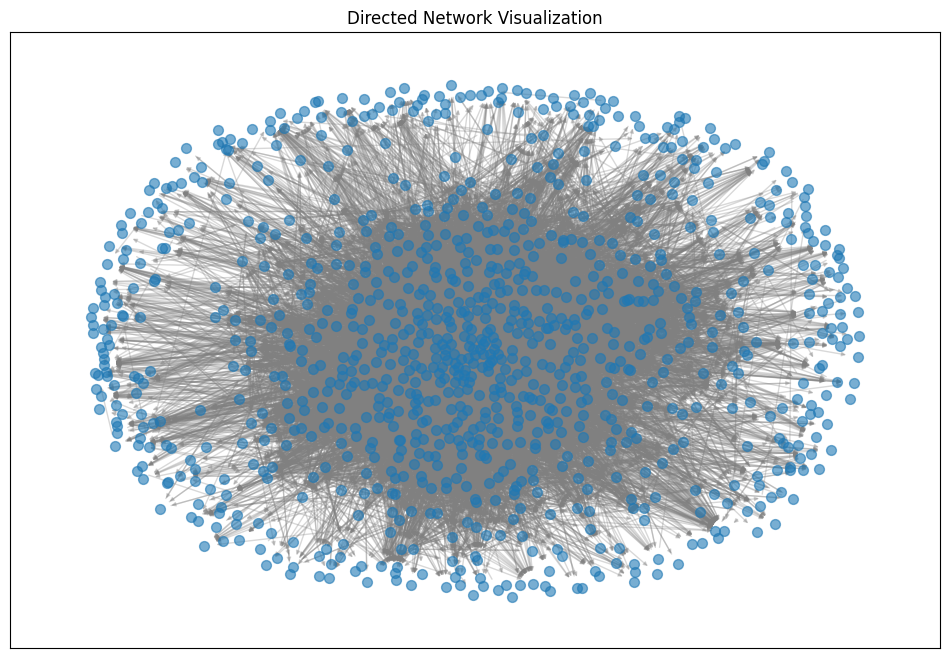

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.6)
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color="gray", arrows=True, arrowstyle='-|>', arrowsize=6)
plt.title("Directed Network Visualization")
plt.show()

## 1.4 Socio Matrix

In [7]:
# Create a sorted list of node IDs to ensure consistent ordering
node_list = sorted(G.nodes())

# Create an adjacency matrix (socio-matrix) with rows and columns as node IDs
socio_matrix = nx.to_numpy_array(G, nodelist=node_list, dtype=int)

# Convert to DataFrame for better readability
socio_df = pd.DataFrame(socio_matrix, index=node_list, columns=node_list)

print("Socio-Matrix (Adjacency Matrix):")
socio_df

Socio-Matrix (Adjacency Matrix):


0     1     2     3     4     5     6     7     8     9     ...  995   \
0        0     1     0     0     0     1     1     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     1     1     1     1     0     0     0  ...     0   
3        0     0     1     0     1     0     1     0     0     0  ...     0   
4        0     0     1     1     0     0     1     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1000     0     0     0     0     0     0     0     0     0     0  ...     0   
1001     0     0     1     0     1     0     1     0     0     0  ...     0   
1002     0     0     0     0     0     0     0     0     0     0  ...     0   
1003     0     0     0     0     0     0     0     0     0     0  ...     0   
1004     0     0     0     0     0     0     0     0     0     0  ...     0   

      996   997   998   999   1000  1001  1002  1003  1004  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     1     0     0     0  
3        0     0     0     0     0     1     0     0     0  
4        0     0     0     0     0     1     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1000     0     0     0     0     0     0     0     0     0  
1001     0     0     0     0     0     0     0     0     0  
1002     0     0     0     0     0     0     0     0     0  
1003     0     0     0     0     0     0     0     0     0  
1004     0     0     0     0     0     0     0     0     0  

[1005 rows x 1005 columns]

Adjacency matrix (socio-matrix) is too large to print directly in Jupyter Notebook

In [8]:
# Display only a small portion of the socio-matrix
print("Socio-Matrix (First 15 Rows & Columns):")
print(socio_df.iloc[:15, :15])  # Show only the first 10 rows & columns

Socio-Matrix (First 15 Rows & Columns):
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0    0   1   0   0   0   1   1   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2    0   0   0   1   1   1   1   0   0   0   0   0   0   1   0
3    0   0   1   0   1   0   1   0   0   0   0   0   0   0   0
4    0   0   1   1   0   0   1   0   0   0   0   0   0   1   0
5    1   0   1   0   0   0   1   1   0   0   0   1   0   0   0
6    1   0   1   1   1   1   0   0   0   0   0   0   0   0   0
7    0   0   0   0   0   1   0   0   1   0   0   1   1   0   0
8    0   0   0   0   0   0   0   1   0   1   0   1   1   0   0
9    0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0
11   0   0   0   0   0   0   0   1   1   0   1   0   1   0   0
12   0   0   0   0   0   0   0   1   1   0   0   1   0   1   1
13   0   0   1   0   1   0   0   0   0   0   1   0   0   0   0
14   0   0   0 

In [66]:
# # Save the socio-matrix to a CSV file
# socio_df.to_csv("socio_matrix.csv")

## 1.5 Nodal Degree

To calculate the degree for a directed graph, we need to compute:

- In-degree: Number of incoming edges (emails received).
- Out-degree: Number of outgoing edges (emails sent).


In [9]:
# Compute in-degree (emails received) and out-degree (emails sent)
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Store node information in a list of dictionaries
degree_list = []

for node in G.nodes():
    department = G.nodes[node]['department']  # Retrieve department from node attributes
    degree_list.append({
        'NodeID': node,
        'In-Degree': in_degrees[node],
        'Out-Degree': out_degrees[node],
        'Department': department
    })

print(degree_list[:5])  # Display first 5 nodes' degree info

# Save to a DataFrame for further analysis
# degree_df = pd.DataFrame(degree_list)
# degree_df.to_csv("degree_metrics.csv", index=False)

[{'NodeID': 0, 'In-Degree': 31, 'Out-Degree': 40, 'Department': 1}, {'NodeID': 1, 'In-Degree': 50, 'Out-Degree': 0, 'Department': 1}, {'NodeID': 2, 'In-Degree': 76, 'Out-Degree': 83, 'Department': 21}, {'NodeID': 3, 'In-Degree': 61, 'Out-Degree': 55, 'Department': 21}, {'NodeID': 4, 'In-Degree': 73, 'Out-Degree': 88, 'Department': 21}]


## **Load `degree_df`:**

In [5]:
degree_df = pd.read_csv("degree_metrics.csv")

In [6]:
degree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   NodeID      1005 non-null   int64
 1   In-Degree   1005 non-null   int64
 2   Out-Degree  1005 non-null   int64
 3   Department  1005 non-null   int64
dtypes: int64(4)
memory usage: 31.5 KB


## 1.6 Mean Degree

Mean Degree = (Sum of all in-degrees + Sum of all out-degrees) / Total number of nodes

In [28]:
# Compute Total Degree (In-Degree + Out-Degree) for each node
degree_df['Total Degree'] = degree_df['In-Degree'] + degree_df['Out-Degree']

# Compute the mean total degree
mean_total_degree = degree_df['Total Degree'].mean()

print(f"Mean Total Degree: {mean_total_degree:.2f}")

Mean Total Degree: 50.89


## 1.7 Variance

In [29]:
import numpy as np

# Compute Total Degree (In-Degree + Out-Degree) for each node
degree_df['Total Degree'] = degree_df['In-Degree'] + degree_df['Out-Degree']

# Compute mean total degree
mean_total_degree = degree_df['Total Degree'].mean()

# Compute variance of total degree
variance_total_degree = np.var(degree_df['Total Degree'], ddof=0)  # ddof=0 for population variance
print(f"Variance of Total Degree: {variance_total_degree:.2f}")

Variance of Total Degree: 3615.31


**High Variance (3615.31 is a Large Value):**

Some nodes have very high degrees while others have very low degrees.
The network is heterogeneous (i.e., has hubs with many connections).

## 1.8 In-Degree Distribution

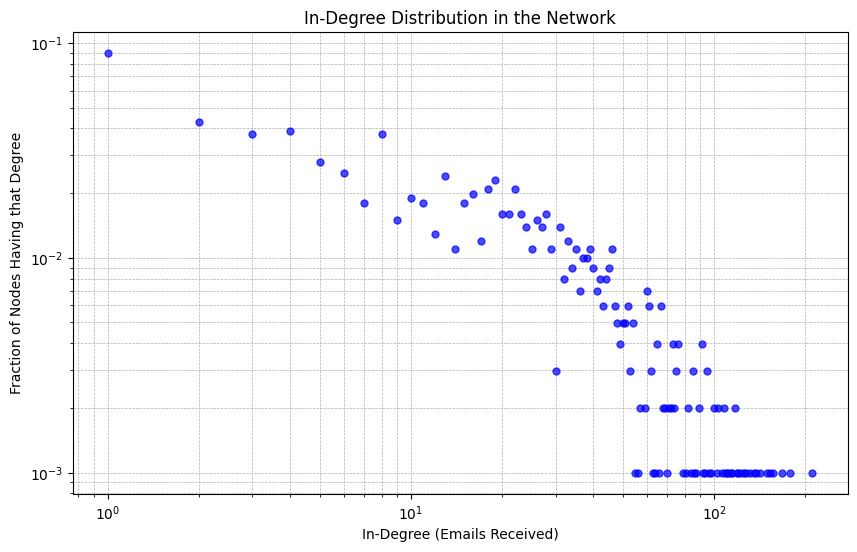

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Count occurrences of each degree
degree_distribution = Counter(in_degrees.values())

# Compute probability (degree distribution)
total_nodes = len(G.nodes())
degree_values, degree_counts = zip(*sorted(degree_distribution.items()))
degree_probabilities = [count / total_nodes for count in degree_counts]

plt.figure(figsize=(10, 6))
plt.loglog(degree_values, degree_probabilities, marker='o', linestyle='None', color='b', markersize=5, alpha=0.7)
plt.xlabel("In-Degree (Emails Received)")
plt.ylabel("Fraction of Nodes Having that Degree")
plt.title("In-Degree Distribution in the Network")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

- The downward trend indicates that high in-degree nodes are much less frequent than low in-degree nodes.
- The plot shows that most nodes (email users) receive only a few emails (low in-degree).
- A small number of nodes receive a large number of emails (high in-degree), forming the long tail of the distribution.
- This is a common feature in social and communication networks, where a few individuals (e.g., managers, department heads, or administrators) receive significantly more emails than others.

- A small number of individuals act as central hubs, receiving many emails.
- This suggests apossibility of hierarchical or organizational structure, where most communication is directed toward a few key individuals.

**Possible Real-World Explanations:**
- Administrative or managerial roles: Some employees (e.g., department heads) receive many emails from different researchers.
- Help desk or automated response systems: Certain email accounts may be receiving automated emails.
- Inequality in communication: Some people act as information bottlenecks, filtering messages to others.

**Network Resilience & Influence:**
- The small number of nodes with very high in-degree may indicate that removing them (e.g., a key administrator) could significantly impact the network's efficiency.
- These high-degree nodes might also influence the spread of information, making them critical to the flow of emails.

**Our Next Step:**
- We could look at reciprocity (how many of the emails they receive are responded to).
- Investigating betweenness centrality might reveal their role in connecting different parts of the network.

## 1.9 Out-Degree Distribution

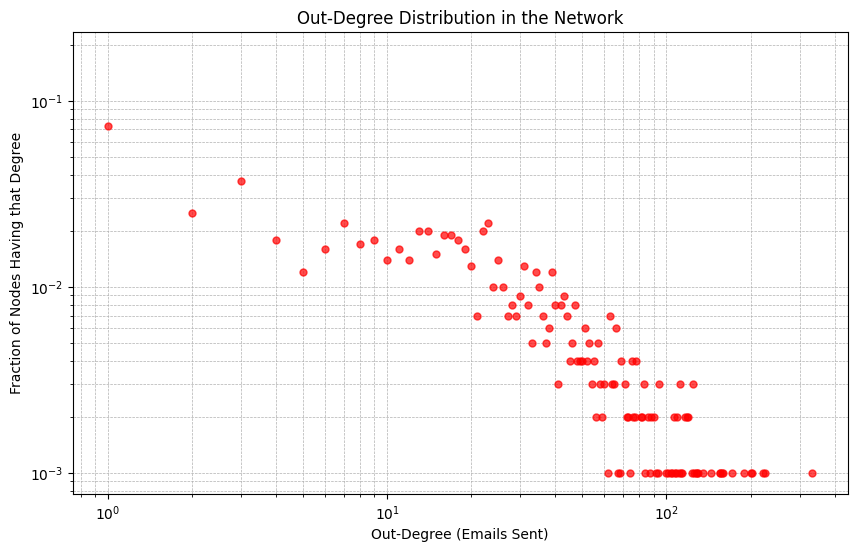

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter

# Compute out-degrees
out_degrees = dict(G.out_degree())

# Count occurrences of each out-degree
out_degree_distribution = Counter(out_degrees.values())

# Compute probability (degree distribution) for out-degree
total_nodes = len(G.nodes())
out_degree_values, out_degree_counts = zip(*sorted(out_degree_distribution.items()))
out_degree_probabilities = [count / total_nodes for count in out_degree_counts]

plt.figure(figsize=(10, 6))
plt.loglog(out_degree_values, out_degree_probabilities, marker='o', linestyle='None', color='red', markersize=5, alpha=0.7)
plt.xlabel("Out-Degree (Emails Sent)")
plt.ylabel("Fraction of Nodes Having that Degree")
plt.title("Out-Degree Distribution in the Network")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

**Interpretation of Out-Degree Distribution**

**Key Observations**
- Most nodes have a low out-degree. The majority of users send only a few emails.
- Few nodes have a very high out-degree. These users send significantly more emails than others.
- We observe the long-tail distribution. Also, the presence of outliers suggests that some individuals are sending emails at a much higher rate than the average user.
- The downward trend means that high out-degree nodes are much less frequent.

**Possible Explanations**
- Administrative roles: Some users, like assistants or managers, may send emails to multiple people frequently.
- Automated email systems: Certain nodes may correspond to mailing lists, notifications, or automated responses.

**Network Structure Insights**
- High out-degree nodes might be **influential communicators**, helping spread information quickly.
- If a small number of people dominate email traffic, the network could be centralized around them.

**Next Steps for Analysis**
- Are those who send many emails also receiving many emails?
- How many sent emails receive replies? Reciprocity???
- Which users have the highest out-degree, and Which department do they belong to?

### 1.10 Density

In [32]:
# Compute density of the directed graph
density = nx.density(G)

# Print the result
print(f"Density of the Directed Graph: {density:.6f}")

Density of the Directed Graph: 0.024706


`.density(G)` The method ignores self-loops when calculating the denominator (maximum possible edges).

A density close to zero means we have a very sparse network (few connections relative to possible ones).

1. Time Frame of Data Collection
- As you pointed out, we don’t know the exact time period over which the email interactions were recorded.
- If the dataset covers only a short period, many potential interactions might not have happened yet.

2. Organizational Structure & Hierarchy
- Some employees may only interact with a few specific people (e.g., supervisors, assistants, collaborators).
- Senior researchers may communicate mainly with their students or immediate colleagues, rather than the entire network.

3. Email as a Communication Medium
- Not all communication happens via email—people also use meetings, phone calls, chat apps (Slack, Teams, etc.), and informal conversations.
- If people prefer other forms of communication, email interactions may not fully represent the true social structure.

4. Privacy Filters & Data Collection
- The dataset may be filtered or anonymized, meaning certain emails were excluded due to privacy concerns.
- Some organizations may not log all email interactions, reducing the number of observed edges.

-----

# 2. Inter-Departmental Interactions

## 2.1 Sort by In-Degree (Most Emails Received)

In [12]:
# Sort the DataFrame by 'In-Degree' in descending order
sorted_by_in_degree_df = degree_df.sort_values(by='In-Degree', ascending=False)

print("Top 5 nodes by In-Degree:")
sorted_by_in_degree_df.head(5)

Top 5 nodes by In-Degree:


NodeID  In-Degree  Out-Degree  Department
160     160        212         334          36
62       62        179         190          36
107     107        169         204          36
121     121        157         222          36
86       86        154         202          36

## 2.2 Sort by Out-Degree (Most Emails Sent)

In [13]:
# Sort the DataFrame by 'In-Degree' in descending order
sorted_by_out_degree_df = degree_df.sort_values(by='Out-Degree', ascending=False)

print("Top 5 nodes by In-Degree:")
sorted_by_out_degree_df.head(5)

Top 5 nodes by In-Degree:


NodeID  In-Degree  Out-Degree  Department
160     160        212         334          36
82       82        121         227          36
121     121        157         222          36
107     107        169         204          36
86       86        154         202          36

In [14]:
# Calculating and creating a column for Total Degree
degree_df['Total Degree'] = degree_df['In-Degree'] + degree_df['Out-Degree']
sorted_by_total_degree = degree_df.sort_values(by='Total Degree', ascending=False)
print("Top 5 Most Active Individuals (by Total Degree):")
sorted_by_total_degree.head(5)

Top 5 Most Active Individuals (by Total Degree):


NodeID  In-Degree  Out-Degree  Department  Total Degree
160     160        212         334          36           546
121     121        157         222          36           379
107     107        169         204          36           373
62       62        179         190          36           369
86       86        154         202          36           356

We can observe that the top 5 individuals who sent and received emails belong to department 36.

## 2.3 Departments and Their Total In-degree and Out-degree

In [15]:
# Group by 'Department' and sum 'In-Degree' and 'Out-Degree'
dept_degree_df = degree_df.groupby('Department')[['In-Degree', 'Out-Degree']].sum()

# Rename columns for clarity
dept_degree_df = dept_degree_df.rename(columns={'In-Degree': 'Total In-Degree', 'Out-Degree': 'Total Out-Degree'})

In [16]:
# Sort the grouped department DataFrame by 'Total In-Degree' in descending order
dept_sorted_by_in_degree = dept_degree_df.sort_values(by='Total In-Degree', ascending=False)

# Display the top 5 departments
print("Departments sorted by Highest Total In-Degree:")
dept_sorted_by_in_degree.head(5)

Departments sorted by Highest Total In-Degree:


Total In-Degree  Total Out-Degree
Department                                   
4                      2700              2652
14                     2273              2100
36                     1905              2334
21                     1395              1354
1                      1326              1147

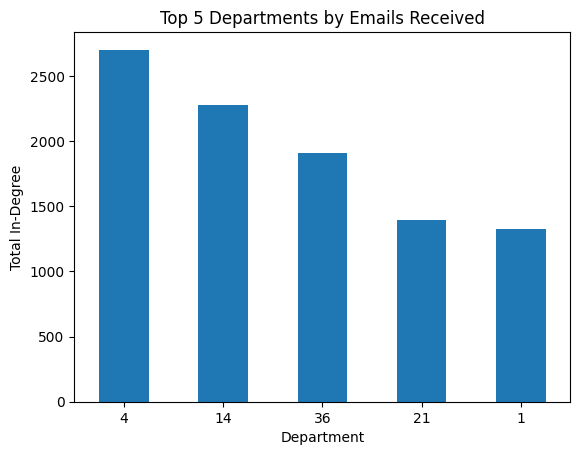

In [17]:
import matplotlib.pyplot as plt

# Top 5 Departments by In-Degree
dept_sorted_by_in_degree.head(5).plot(kind='bar', y='Total In-Degree', title="Top 5 Departments by Emails Received", legend=False)
plt.ylabel("Total In-Degree")
plt.xticks(rotation=0)
plt.show()

In [18]:
# Sort the grouped department DataFrame by 'Total In-Degree' in descending order
dept_sorted_by_out_degree = dept_degree_df.sort_values(by='Total Out-Degree', ascending=False)

# Display the top 5 departments
print("Departments sorted by Highest Total In-Degree:")
dept_sorted_by_out_degree.head(5)

Departments sorted by Highest Total In-Degree:


Total In-Degree  Total Out-Degree
Department                                   
4                      2700              2652
36                     1905              2334
14                     2273              2100
21                     1395              1354
7                      1252              1222

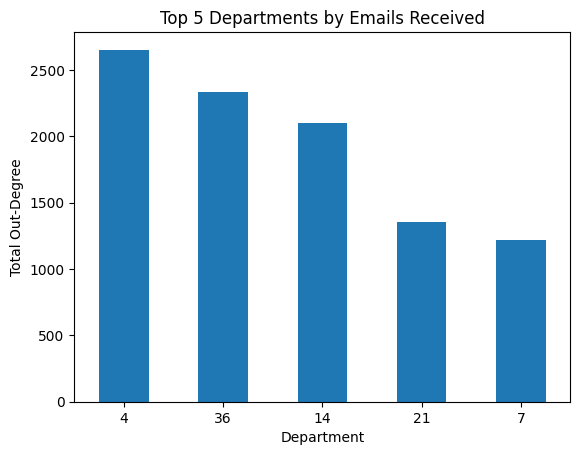

In [19]:
import matplotlib.pyplot as plt

# Top 5 Departments by In-Degree
dept_sorted_by_out_degree.head(5).plot(kind='bar', y='Total Out-Degree', title="Top 5 Departments by Emails Received", legend=False)
plt.ylabel("Total Out-Degree")
plt.xticks(rotation=0)
plt.show()

## 2.4 Communication Ratio

Compute the In-Degree to Out-Degree Ratio for departments to see which departments receive more than they send (support teams) or send more than they receive (management teams):

In [20]:
import numpy as np

# Avoid division by zero by replacing zero values with NaN or a small value
dept_degree_df['In/Out Ratio'] = np.where(dept_degree_df['Total Out-Degree'] == 0, np.nan,
                                          dept_degree_df['Total In-Degree'] / dept_degree_df['Total Out-Degree'])

# Sort by 'In/Out Ratio' in descending order
dept_sorted_by_ratio = dept_degree_df.sort_values(by='In/Out Ratio', ascending=False)

print("Departments sorted by Communication Ratio (In-Degree / Out-Degree):")
dept_sorted_by_ratio.head(5)

Departments sorted by Communication Ratio (In-Degree / Out-Degree):


Total In-Degree  Total Out-Degree  In/Out Ratio
Department                                                 
41                       14                 3      4.666667
30                       29                21      1.380952
29                      109                80      1.362500
3                       255               197      1.294416
1                      1326              1147      1.156059

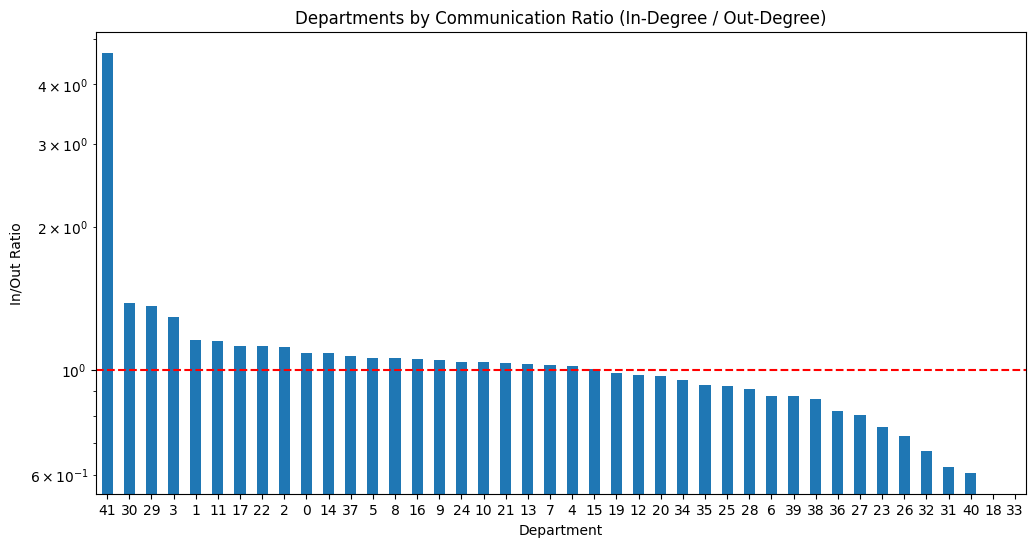

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart using the ax object
dept_sorted_by_ratio.plot(kind='bar', y='In/Out Ratio', title="Departments by Communication Ratio (In-Degree / Out-Degree)", legend=False, ax=ax)
# Add a horizontal line at y=1 to show the threshold
ax.axhline(y=1, color='r', linestyle='--', label='Ratio = 1')
ax.set_ylabel("In/Out Ratio")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Rotate x-axis labels for readability
plt.yscale('log')
plt.show()

In [22]:
def get_dept_degree(department_number, degree_df = degree_df):
    # Filter the DataFrame for the given department
    dept_data = degree_df[degree_df['Department'] == department_number]
    
    # Check if the department exists
    if dept_data.empty:
        return f"Department {department_number} not found."
    
    # Extract In-Degree, Out-Degree and calculate Total Degree
    in_degree = dept_data['In-Degree'].values[0]
    out_degree = dept_data['Out-Degree'].values[0]
    total_degree = in_degree + out_degree
    
    return {
        'Department': department_number,
        'In-Degree': in_degree,
        'Out-Degree': out_degree,
        'Total Degree': total_degree
    }

In [23]:
get_dept_degree(18)

{'Department': 18, 'In-Degree': 6, 'Out-Degree': 0, 'Total Degree': 6}

In [24]:
get_dept_degree(33)

{'Department': 33, 'In-Degree': 3, 'Out-Degree': 0, 'Total Degree': 3}

**Possible reasons for having 0 Out-degree:**

- Incomplete or Missing Data: There might be data quality issues where the Out-Degree for these departments is not properly recorded. This could be due to data entry issues, incorrect data extraction, or email system configurations.
- External communication might be managed by another department, such as a Public Relations or Communications team, while the department focuses on internal matters.
- If a department has been shut down, there would be no new email communications initiated from that department. Emails previously sent by the department would still exist in historical records, but no new emails would be generated, leading to a 0 out-degree.

In [25]:
import numpy as np

# Avoid division by zero by replacing zero values with NaN or a small value
dept_degree_df['Out/In Ratio'] = np.where(dept_degree_df['Total In-Degree'] == 0, np.nan,
                                          dept_degree_df['Total Out-Degree'] / dept_degree_df['Total In-Degree'])

# Sort by 'Out/In Ratio' in descending order
dept_sorted_by_out_in_ratio = dept_degree_df.sort_values(by='Out/In Ratio', ascending=False)

print("Departments sorted by Communication Ratio (Out-Degree / In-Degree):")
dept_sorted_by_out_in_ratio.head(5)

Departments sorted by Communication Ratio (Out-Degree / In-Degree):


Total In-Degree  Total Out-Degree  In/Out Ratio  Out/In Ratio
Department                                                               
40                       83               137      0.605839      1.650602
31                       74               119      0.621849      1.608108
32                      214               318      0.672956      1.485981
26                      368               508      0.724409      1.380435
23                      268               354      0.757062      1.320896

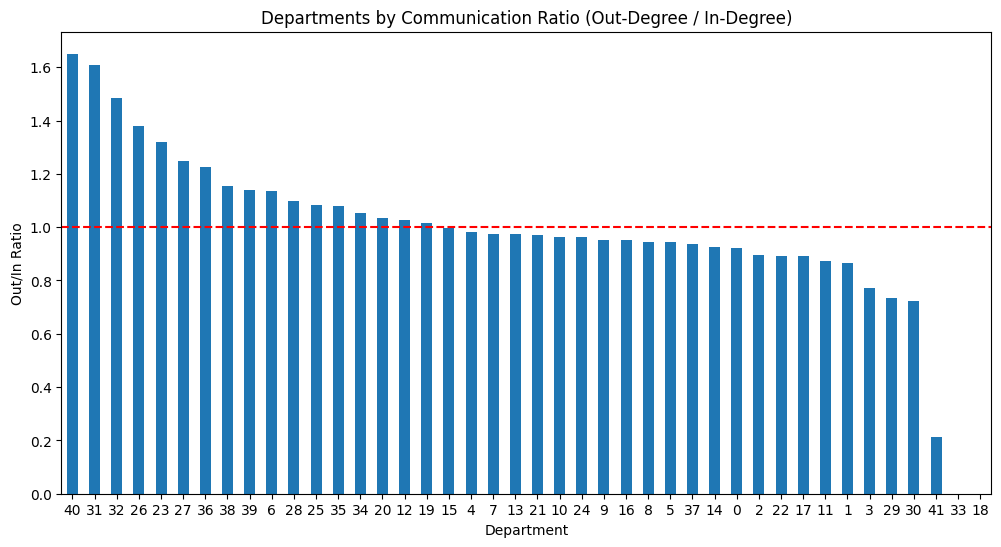

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart using the ax object for 'Out/In Ratio'
dept_sorted_by_out_in_ratio.plot(kind='bar', y='Out/In Ratio', title="Departments by Communication Ratio (Out-Degree / In-Degree)", legend=False, ax=ax)
# Add a horizontal line at y=1 to show the threshold
ax.axhline(y=1, color='r', linestyle='--', label='Ratio = 1')
ax.set_ylabel("Out/In Ratio")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Rotate x-axis labels for readability
plt.show()

**Departments Above the Line (Out/In Ratio > 1)**

These departments send more emails than they receive. In a research institution, this could indicate:

**1.** Administrative and Leadership Roles

- Departments responsible for policy-making, funding, and academic administration (e.g., Office of the Dean, Research Administration, or Grant Management) often send announcements, funding calls, and administrative reminders but receive fewer responses.
Research supervisors may send out project directives or coordination emails but receive fewer emails in return.

**2.** Collaboration-Intensive Research Groups

- Certain research groups may be leading large-scale projects and sending frequent updates, meeting invites, and collaboration requests while receiving fewer responses.

**3.** Technical & IT Support Teams

- While IT helpdesks in a research setting do receive many queries, central IT or infrastructure teams managing lab systems may send more emails regarding system updates, security policies, or scheduled maintenance.

**4.** Interdisciplinary or Outreach-Oriented Research Centers

- Departments facilitating cross-disciplinary collaborations, journal publications, or organizing conferences may send many invitations and coordination emails.

**Departments Below the Line (Out/In Ratio < 1)**

These departments receive more emails than they send, which may indicate:

**1.** Lab-Based or Experimental Research Groups

- Some research groups often receive protocols, data requests, or administrative emails but send fewer messages themselves.
They may also receive safety compliance emails or funding updates but do not initiate as many emails.

**2.** Graduate Student & Postdoc-Dominated Departments

- Some departments with a high proportion of graduate students, postdocs, or early-career researchers may receive a high volume of emails from supervisors, journal submission portals, and conference organizers but send fewer emails in response.

In [27]:
# #Compute the summation of all in-degrees (total number of received emails) or Out-degrees (they should be equal)
# total_in_degree = sum(dict(G.in_degree()).values())
# total_out_degree = sum(dict(G.out_degree()).values())
# print(total_in_degree )
# print(total_out_degree)

-----

Let's identify the departmental affiliation of each node and filter email communications to retain only intra-department interactions, ensuring that both sender and recipient belong to the same department:

In [33]:
# # Merge edges with department information for both source and target nodes
# edges_with_departments = edges_df.merge(nodes_df, left_on="Source", right_on="NodeID") \
#                                 .merge(nodes_df, left_on="Target", right_on="NodeID", suffixes=("_source", "_target"))

# department_email_data = {}

# for dept, df in edges_with_departments.groupby("Department_source"):
#     # Emails where both sender and receiver are in the same department
#     within_department_df = df[df["Department_source"] == df["Department_target"]][["Source", "Target"]]
#     within_department_count = len(within_department_df)

#     # Emails where the sender is in the department, but the receiver is in another department
#     outside_department_df = df[df["Department_source"] != df["Department_target"]][["Source", "Target", "Department_target"]]
#     outside_department_count = len(outside_department_df)

#     # Store data in dictionary
#     department_email_data[dept] = {
#         "within_department": {
#             "emails": within_department_df,
#             "count": within_department_count
#         },
#         "outside_department": {
#             "emails": outside_department_df,
#             "count": outside_department_count
#         }
#     }

# # Display the within and outside department emails for the first department
# first_department = list(department_email_data.keys())[0]

# # Show the DataFrames
# print(f"Department {first_department} - Within Department Emails:")
# print(department_email_data[first_department]["within_department"]["emails"].head(), "\n")

# print(f"Department {first_department} - Outside Department Emails:")
# print(department_email_data[first_department]["outside_department"]["emails"].head(), "\n")

# # Print the number of emails within and outside the department
# print(f"Department {first_department} - Within Department Email Count:", department_email_data[first_department]["within_department"]["count"])
# print(f"Department {first_department} - Outside Department Email Count:", department_email_data[first_department]["outside_department"]["count"])

In [28]:
department_email_data

{0: {'within_department': {'emails':        Source  Target
   275       180     178
   276       191     178
   278       214     178
   279       231     178
   282       178     178
   ...       ...     ...
   24974     262     903
   24975     907     903
   25048     231     692
   25049     231     871
   25386     157     668
   
   [456 rows x 2 columns],
   'count': 456},
  'outside_department': {'emails':        Source  Target  Department_target
   23        284       1                  1
   28        351       1                  1
   260       156     734                  1
   265       157     734                  1
   268       284     734                  1
   ...       ...     ...                ...
   25232     284     472                  6
   25346     178     629                  1
   25413     851     605                  1
   25421     278     722                 11
   25509     350     861                  5
   
   [454 rows x 3 columns],
   'count': 454}},
 1: {'w

**Example Output:**

- Accessing Within-Department Emails for Department 3:

In [30]:
# department_email_data[3]["within_department"]["emails"][:3]

Source  Target
135      77     581
147      79     581
149     497     581

- Getting Count of Within-Department Emails for Department 5:

In [31]:
# department_email_data[5]["within_department"]["count"]

158

- Getting Outside-Department Emails for Department 2:

In [35]:
# department_email_data[2]["outside_department"]["emails"][:3]

Source  Target  Department_target
720     340     218                  1
729     482     218                  1
909     134      74                  1

To save the dictionary of DataFrames (department_email_data) in a way that preserves both the data structure and data types, we can use Python's pickle module. This will allow us to reload it later without any type conversion issues:

In [36]:
# import pickle

# # Save the dictionary to a file
# with open("department_email_data.pkl", "wb") as file:
#     pickle.dump(department_email_data, file)

**Load from here:**

In [34]:
import pickle

# Load the dictionary from the file
with open("department_email_data.pkl", "rb") as file:
    department_email_data = pickle.load(file)

**If the code above didn't work, try code below:**

In [ ]:
# import pandas as pd

# department_email_data = pd.read_pickle("/content/drive/My Drive/Colab Datasets/department_email_data.pkl")

-----

What can we do with this dataset:

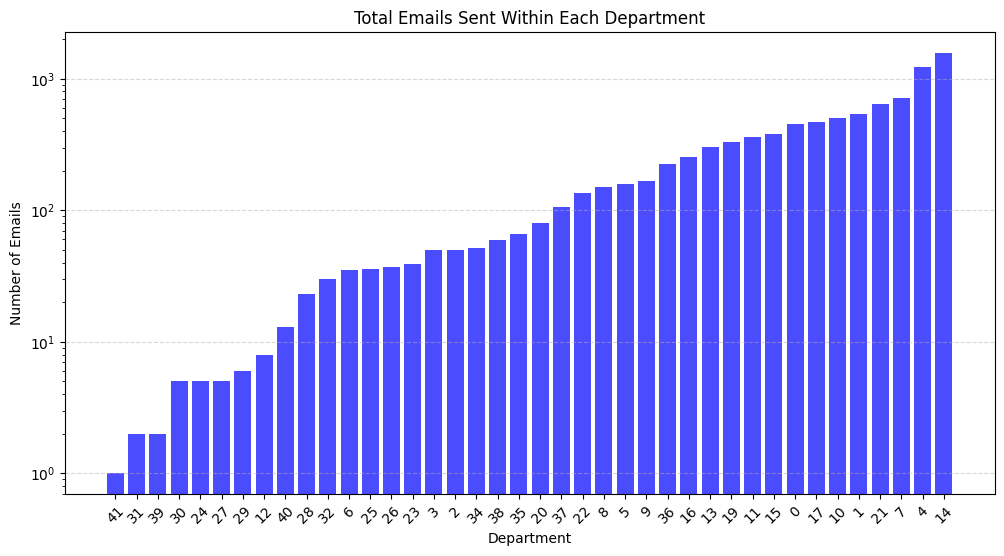

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Extract department IDs and within-department email counts
departments = list(department_email_data.keys())
total_within_emails = [department_email_data[dept]["within_department"]["count"] for dept in departments]

# Sort departments based on within-department email counts (ascending)
sorted_indices = np.argsort(total_within_emails)
sorted_departments = [str(departments[i]) for i in sorted_indices]
sorted_within_emails = [total_within_emails[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(sorted_departments, sorted_within_emails, color="blue", alpha=0.7)
plt.xlabel("Department")
plt.ylabel("Number of Emails")
plt.title("Total Emails Sent Within Each Department")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.yscale('log')
plt.show()

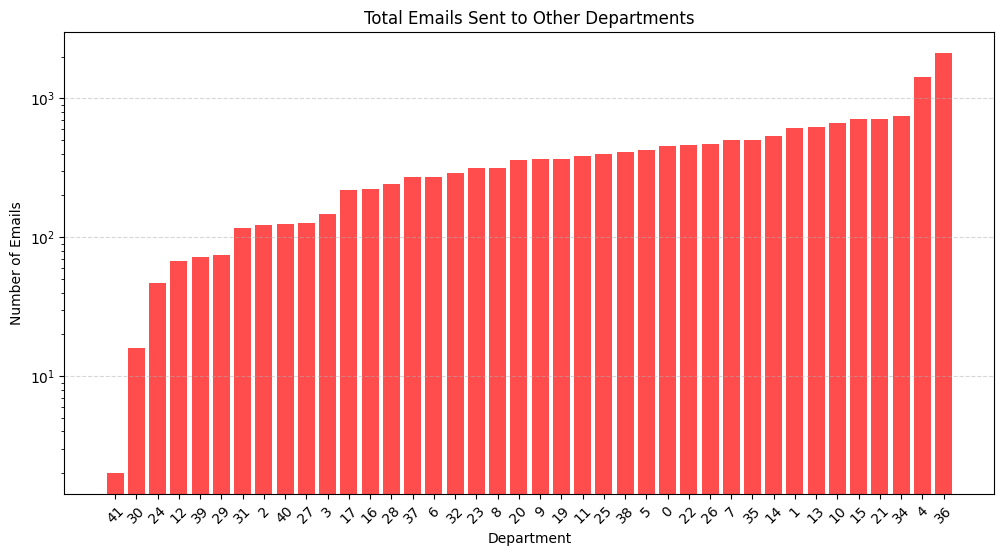

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Extract department IDs and outside-department email counts
departments = list(department_email_data.keys())
total_outside_emails = [department_email_data[dept]["outside_department"]["count"] for dept in departments]

# Sort departments based on outside-department email counts (ascending)
sorted_indices = np.argsort(total_outside_emails)
sorted_departments = [str(departments[i]) for i in sorted_indices]
sorted_outside_emails = [total_outside_emails[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(sorted_departments, sorted_outside_emails, color="red", alpha=0.7)
plt.xlabel("Department")
plt.ylabel("Number of Emails")
plt.title("Total Emails Sent to Other Departments")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.yscale('log')
plt.show()

We can analyze inter-department email communication by extracting the number of emails exchanged between each pair of departments and then ranking them.

Here’s how we can do it:

**Steps:**
1. Create a Department-to-Department Matrix
- Count the number of emails exchanged between each pair of departments.
- Store these counts in a matrix (or a DataFrame).
2. Extract & Rank the Top Department Pairs
- Convert the department-to-department matrix into a ranked list.
- Sort the pairs based on the number of emails exchanged.

In [37]:
import pandas as pd

# Create a dictionary to store department-to-department email counts
department_pairs = {}

# Iterate through the department email data to count emails between departments
for dept, data in department_email_data.items():
    outside_emails = data["outside_department"]["emails"]

    for _, row in outside_emails.iterrows():
        target_dept = row["Department_target"]
        
        # Create a sorted tuple to ensure uniqueness (Dept A → Dept B is the same as Dept B → Dept A)
        dept_pair = tuple(sorted([dept, target_dept]))

        # Increment count for the department pair
        if dept_pair in department_pairs:
            department_pairs[dept_pair] += 1
        else:
            department_pairs[dept_pair] = 1

# Convert dictionary to DataFrame
dept_pair_df = pd.DataFrame(
    list(department_pairs.items()), 
    columns=["Department Pair", "Email Count"]
)

# Sort by number of emails exchanged in descending order
dept_pair_df = dept_pair_df.sort_values(by="Email Count", ascending=False)

print(dept_pair_df)

    Department Pair  Email Count
115         (4, 36)          384
131          (4, 5)          321
475        (21, 22)          313
381        (15, 36)          276
14           (0, 4)          273
..              ...          ...
270         (9, 27)            1
244         (8, 41)            1
239         (8, 24)            1
418        (11, 16)            1
595         (5, 32)            1

[641 rows x 2 columns]


**How It Works**
- Iterates over each department's outside department emails.
- Extracts the target department from the email interactions.
- Uses a sorted tuple (dept, target_dept) to ensure symmetry (A → B is the same as B → A).
- Increments the email count for each department pair.
- Converts the results into a DataFrame and sorts it in descending order based on the number of email exchanges.
- Prints the ranking of department pairs based on communication frequency.

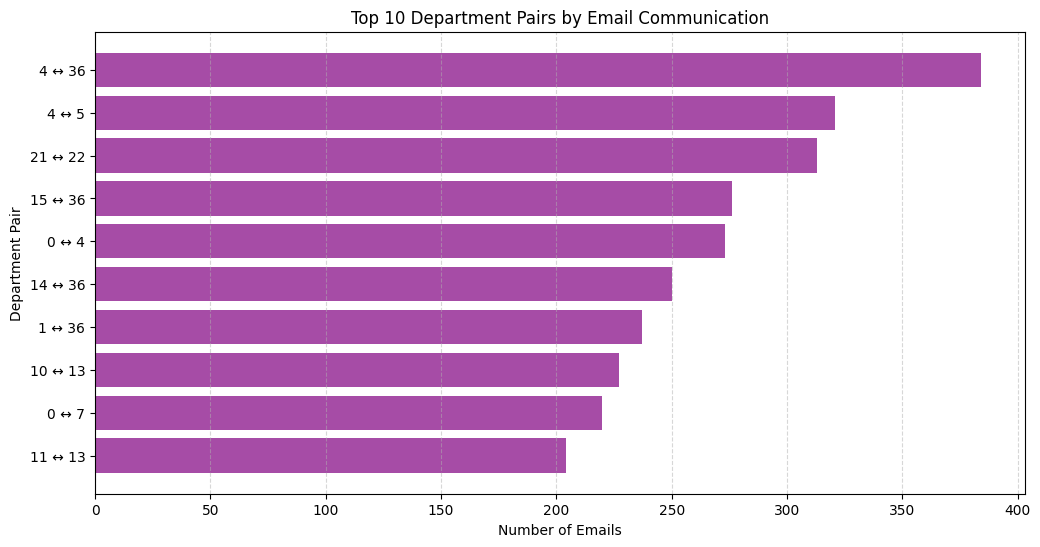

In [38]:
import matplotlib.pyplot as plt

# Select the top 10 department pairs by email count
top_10_pairs = dept_pair_df.head(10)

# Extract labels and values
pairs = [f"{pair[0]} ↔ {pair[1]}" for pair in top_10_pairs["Department Pair"]]
email_counts = top_10_pairs["Email Count"]

# Plot the top 10 department pairs
plt.figure(figsize=(12, 6))
plt.barh(pairs, email_counts, color="purple", alpha=0.7)
plt.xlabel("Number of Emails")
plt.ylabel("Department Pair")
plt.title("Top 10 Department Pairs by Email Communication")
plt.gca().invert_yaxis()  # Invert y-axis to show highest value on top
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

----

# 3. Path Analysis and Efficiency

## 3.1 Eccentricity and Diameter

- Diameter: Longest shortest path, indicating network reachability.
- Eccentricity - How far each node is from the farthest node in the network.

We measure communication efficiency through geodesic distances.

In [9]:
# Compute network diameter
diameter = nx.diameter(G.to_undirected())

# Find average shortest path length
avg_path_length = nx.average_shortest_path_length(G.to_undirected())

print("Network Diameter:", diameter)
print("Average Shortest Path Length:", avg_path_length)

NetworkXError: Found infinite path length because the graph is not connected

**Issue: Graph is Not Connected**

The error occurs because your network is disconnected (i.e., some nodes cannot reach others), making it impossible to compute:

- Diameter: The longest shortest path between any two nodes.

Since the metric requires a single connected component, NetworkX raises an error when computing the diameter on a disconnected graph.

**Solution: Compute for the Largest Connected Component**

Instead of computing these metrics on the entire graph, we should:

- Extract the largest connected component (LCC).
- Compute the diameter and eccentricity only on that component.

In [40]:
import networkx as nx

# Convert to undirected graph
G_undirected = G.to_undirected()

# Get the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)

# Create a subgraph with only the largest connected component
G_lcc = G_undirected.subgraph(largest_cc)

# Compute network diameter
diameter = nx.diameter(G_lcc)

# Compute eccentricity (max shortest path distance for each node)
eccentricity = nx.eccentricity(G_lcc)

print("Network Diameter (Largest Component):", diameter)
# print("Eccentricity of Nodes (Largest Component):", eccentricity)

Network Diameter (Largest Component): 7


In [83]:
print("Eccentricity of Nodes (Largest Component):", eccentricity)

Eccentricity of Nodes (Largest Component): {0: 4, 1: 4, 2: 5, 3: 5, 4: 5, 5: 4, 6: 4, 7: 5, 8: 5, 9: 5, 10: 5, 11: 5, 12: 4, 13: 4, 14: 4, 15: 5, 16: 4, 17: 4, 18: 4, 19: 5, 20: 5, 21: 4, 22: 5, 23: 5, 24: 5, 25: 4, 26: 4, 27: 4, 28: 5, 29: 4, 30: 5, 31: 5, 32: 5, 33: 4, 34: 5, 35: 4, 36: 5, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 5, 43: 5, 44: 5, 45: 5, 46: 5, 47: 4, 48: 4, 49: 5, 50: 5, 51: 4, 52: 4, 53: 4, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 4, 61: 4, 62: 4, 63: 5, 64: 4, 65: 4, 66: 5, 67: 5, 68: 5, 69: 5, 70: 4, 71: 5, 72: 5, 73: 5, 74: 4, 75: 5, 76: 4, 77: 5, 78: 5, 79: 4, 80: 5, 81: 5, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 4, 88: 5, 89: 5, 90: 5, 91: 5, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 5, 98: 5, 99: 5, 100: 5, 101: 5, 102: 5, 103: 4, 104: 4, 105: 4, 106: 4, 107: 4, 108: 5, 109: 5, 110: 5, 111: 5, 112: 5, 113: 4, 114: 4, 115: 4, 116: 4, 117: 5, 118: 5, 119: 5, 120: 4, 121: 4, 122: 4, 123: 4, 124: 5, 125: 5, 126: 5, 127: 4, 128: 4, 129: 4, 130: 4, 131: 5, 132: 5, 13

We can find the nodes with an eccentricity value of 7:

In [41]:
# Find nodes with eccentricity equal to 7
max_eccentric_nodes = [node for node, ecc in eccentricity.items() if ecc == 7]
print("Nodes with Eccentricity of 7:", max_eccentric_nodes)

Nodes with Eccentricity of 7: [634, 846]


- Nodes `[634, 846]` have `eccentricity = 7`, meaning they are the most distant nodes in the largest component.

`nx.connected_components(G_undirected)`:

- Finds all groups of nodes that are connected.
- Returns a list of sets, where each set represents a connected component.

`max(nx.connected_components(G_undirected), key=len)`:

- Extracts the largest component (i.e., the biggest group of connected nodes).

`G.subgraph(largest_cc)`:

- Creates a subgraph containing only the largest component.

Now, `diameter` and `eccentricity` are only calculated on the largest connected component, avoiding errors.

**Interpreting the Results**

- **Diameter:** The longest shortest path within the largest component.
A high diameter suggests that some nodes are far apart.
A low diameter suggests an overall compact network.

- Nodes 634 and 846 are likely in the periphery of the LCC, meaning they are less efficiently connected compared to more central nodes.
A low eccentricity (small values) indicates that a node is well connected and close to other nodes.
A high eccentricity (large values) suggests that a node is on the outskirts of the network and takes longer to reach the rest.

**Communication Efficiency**
- The majority of nodes can communicate within a few steps. However, some nodes (e.g., 634, 846) require 7 steps, meaning certain areas are less efficiently connected.

 There is an opportunity for optimizing the network. Improvements in efficiency are needed for this network.

## 3.2 Analyze Nodes by Eccentricity and Their Departments

C:\Users\alire\AppData\Local\Temp\ipykernel_30228\3697485354.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Eccentricity")


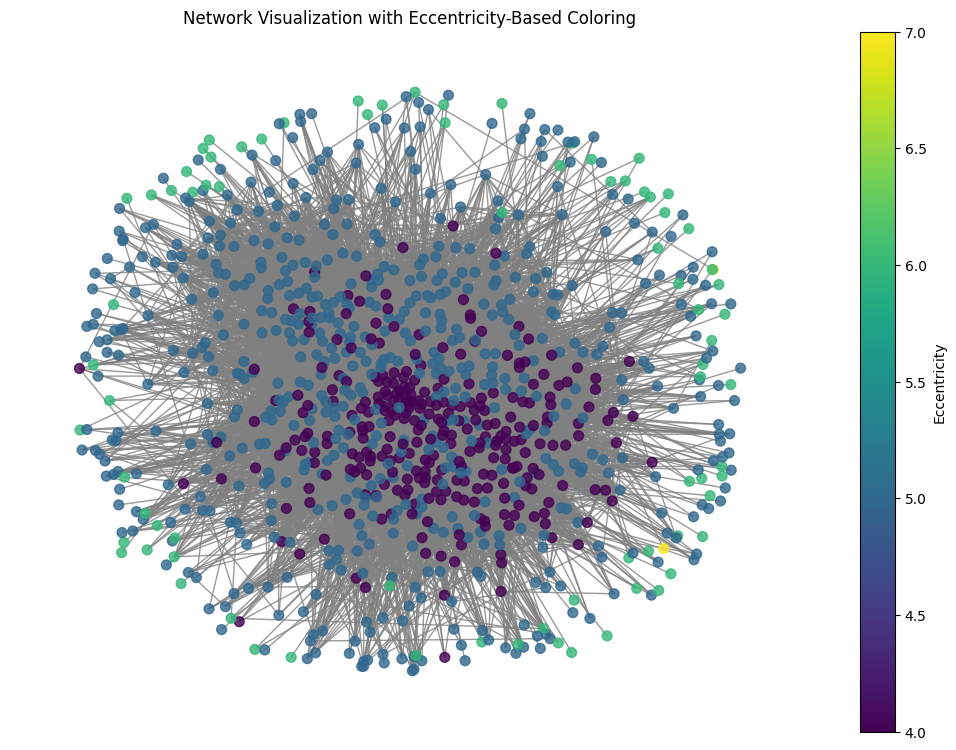

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
# Define node colors based on eccentricity (higher eccentricity = darker color)
node_colors = [eccentricity[node] for node in G_lcc.nodes()]
pos = nx.spring_layout(G_lcc, k=0.5, iterations=50)

# Draw the graph with nodes colored by eccentricity
nx.draw(G_lcc, pos, node_color=node_colors, cmap=plt.cm.viridis, node_size=50, alpha=0.8, with_labels=False, edge_color="gray")

# Add color bar to indicate eccentricity values
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
plt.colorbar(sm, label="Eccentricity")
plt.title("Network Visualization with Eccentricity-Based Coloring")
plt.show()

**To Analyze Nodes by Eccentricity and Their Departments:** We will categorize nodes based on their eccentricity values (4, 5, 6, and 7) and analyze the departments they belong to.

**Steps:**
**1.** Group Nodes by Eccentricity Values (4, 5, 6, 7)

- Extract all nodes with each eccentricity value.
- Store them in separate lists for later analysis.

**2.** Count the Number of Nodes in Each Eccentricity Group

- This will help us understand the distribution of nodes.

**3.** Identify Departments Associated with These Nodes

- Using the nodes_df dataset (which should contain columns like NodeID and Department).
- We map each node to its corresponding department.

**4.** Analyze the Department Distribution in Each Eccentricity Group

- Count how frequently each department appears in the different eccentricity groups.
- This helps us identify which departments are more central and which ones are on the outskirts of communication.

In [43]:
import pandas as pd

# Step 1: Group nodes by eccentricity values
eccentricity_groups = {4: [], 5: [], 6: [], 7: []}

# Assign nodes to respective eccentricity groups
for node, ecc in eccentricity.items():
    if ecc in eccentricity_groups:
        eccentricity_groups[ecc].append(node)

# Step 2: Count the number of nodes in each eccentricity group
eccentricity_counts = {key: len(value) for key, value in eccentricity_groups.items()}

# Step 3: Identify departments associated with these nodes
# Assuming `nodes_df` contains node information with columns ['NodeID', 'Department']
nodes_df = nodes_df.set_index("NodeID")  # Set NodeID as index for quick lookup

# Extract departments for each eccentricity group
eccentricity_departments = {key: nodes_df.loc[value, "Department"].tolist() for key, value in eccentricity_groups.items()}

# Step 4: Count department occurrences in each group
dept_counts_per_eccentricity = {
    key: pd.Series(value).value_counts() for key, value in eccentricity_departments.items()
}


print("Eccentricity Group Counts:")
print(pd.DataFrame.from_dict(eccentricity_counts, orient='index', columns=['Node Count']))

for ecc, df in dept_counts_per_eccentricity.items():
    print(f"\nDepartment Distribution for Eccentricity {ecc}:")
    print(df)

Eccentricity Group Counts:
   Node Count
4         288
5         617
6          79
7           2

Department Distribution for Eccentricity 4:
4     46
7     33
0     32
1     28
10    28
36    17
11    11
5     11
14    10
13     8
34     7
35     6
25     6
26     6
6      5
37     4
23     4
15     4
2      2
22     2
27     2
9      2
8      2
38     2
3      2
17     1
24     1
32     1
20     1
40     1
21     1
12     1
31     1
dtype: int64

Department Distribution for Eccentricity 5:
14    77
4     57
21    43
15    43
17    28
1     26
19    24
6     22
16    22
9     22
23    21
22    20
11    18
13    18
0     17
7     16
8     15
10    11
37    11
3     10
20     9
38     8
27     8
5      7
35     7
2      6
32     6
31     6
36     5
29     5
28     5
34     4
24     4
26     3
39     3
40     3
12     2
41     2
30     1
18     1
33     1
dtype: int64

Department Distribution for Eccentricity 6:
21    11
1      7
9      7
15     7
17     5
19     5
14     4
4      4
22  

- Which departments have the lowest eccentricity (4, 5)? → These departments receive information faster.
- Which departments have the highest eccentricity (6, 7)? → These departments experience more delays in communication.

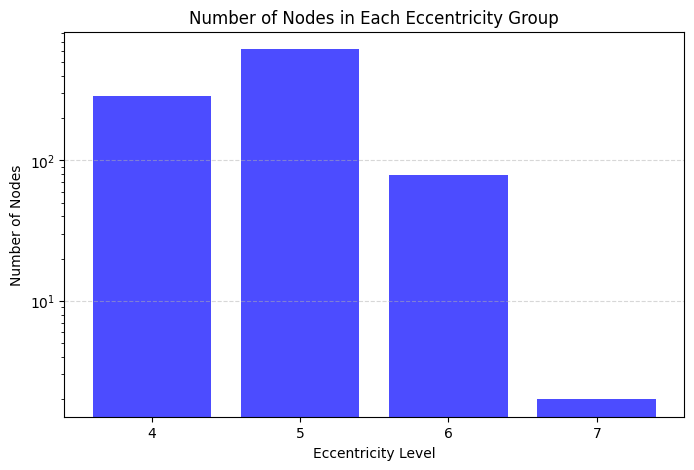

In [44]:
import matplotlib.pyplot as plt

# Visualization 1: Bar chart for number of nodes in each eccentricity group
plt.figure(figsize=(8, 5))
plt.bar(eccentricity_counts.keys(), eccentricity_counts.values(), color='blue', alpha=0.7)
plt.xlabel("Eccentricity Level")
plt.ylabel("Number of Nodes")
plt.title("Number of Nodes in Each Eccentricity Group")
plt.xticks([4, 5, 6, 7])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.yscale('log')
plt.show()

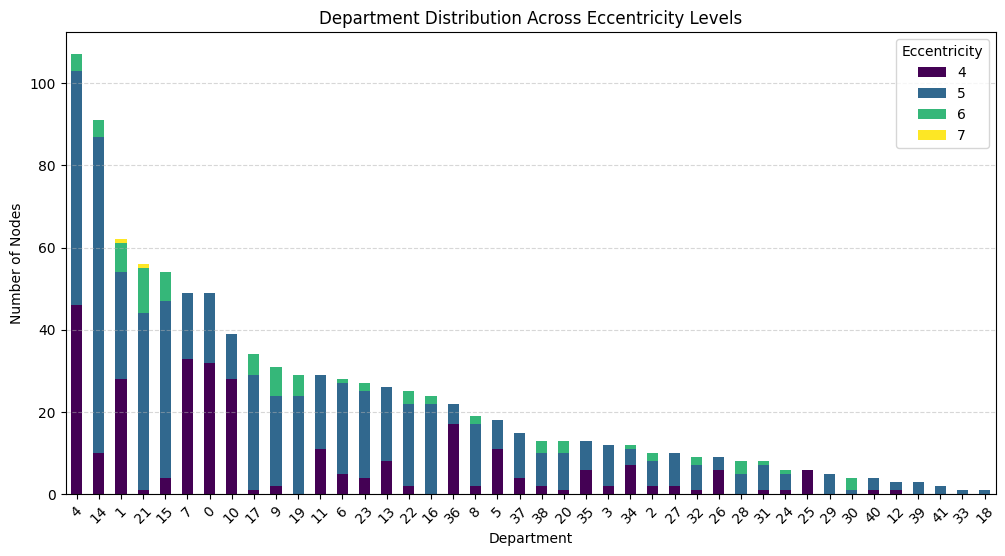

In [45]:
# Convert dictionary to DataFrame and fill NaN with 0
dept_counts_df = pd.DataFrame(dept_counts_per_eccentricity).fillna(0)

# Sort departments based on total node count (sum of all eccentricity levels)
dept_counts_df = dept_counts_df.loc[dept_counts_df.sum(axis=1).sort_values(ascending=False).index]

# Plot the sorted stacked bar chart
dept_counts_df.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Department")
plt.ylabel("Number of Nodes")
plt.title("Department Distribution Across Eccentricity Levels")
plt.xticks(rotation=45)
plt.legend(title="Eccentricity")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## 3.3 Check how many connected components exist in our network:

In [46]:
num_components = nx.number_connected_components(G_undirected)
print("Number of Connected Components:", num_components)

Number of Connected Components: 20


Among the 42 departments, we have identified 20 connected components, which suggests that communication is fragmented.

So, we can identify disconnected nodes:

In [47]:
# Find disconnected nodes (nodes not in the largest component)
disconnected_nodes = set(G.nodes()) - set(largest_cc)
print(f"Total Disconnected Nodes: {len(disconnected_nodes)}")
print("Disconnected Nodes:", disconnected_nodes)

Total Disconnected Nodes: 19
Disconnected Nodes: {772, 648, 653, 658, 660, 798, 670, 675, 808, 684, 691, 703, 580, 711, 731, 732, 744, 746, 633}


## 3.4 Visualize the network to inspect disconnected nodes:

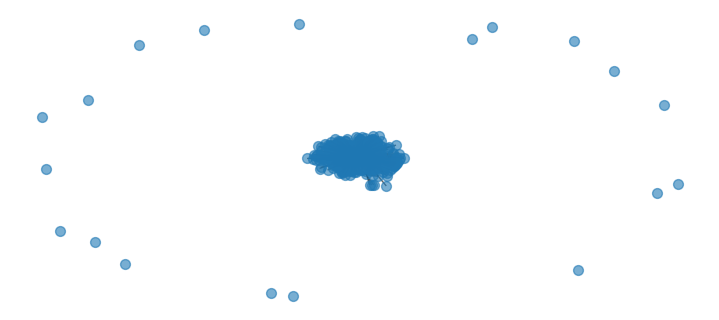

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
nx.draw(G_undirected, node_size=50, alpha=0.6, with_labels=False)
plt.show()

## 3.5 Identify Isolated Nodes and Their Departments

In [54]:
nodes_df.columns

Index(['Department'], dtype='object')

In [55]:
nodes_df

Department
NodeID            
0                1
1                1
2               21
3               21
4               21
...            ...
1000             4
1001            21
1002             1
1003             6
1004            22

[1005 rows x 1 columns]

In [62]:
import pandas as pd
import networkx as nx

# Convert to undirected graph for connected components analysis
# G_undirected = G.to_undirected()

# Get all connected components
connected_components = list(nx.connected_components(G_undirected))

# Find isolated nodes (single-node components)
isolated_nodes = [list(comp)[0] for comp in connected_components if len(comp) == 1]

# Extract departments of isolated nodes
isolated_nodes_df = nodes_df[nodes_df["NodeID"].isin(isolated_nodes)] # this gives a KeyError
# isolated_nodes_df = nodes_df.loc[nodes_df.index.isin(isolated_nodes)]
print("Isolated Nodes and Their Departments:")
print(isolated_nodes_df.to_string(index=False))

Isolated Nodes and Their Departments:
 NodeID  Department
    580          16
    633          21
    648          21
    653           7
    658          14
    660          17
    670          21
    675           1
    684          34
    691          21
    703           9
    711          21
    731           1
    732           4
    744           4
    746          15
    772           7
    798           1
    808          20


## 3.6 Identify All Nodes in the Largest Connected Component

In [63]:
# Find the largest connected component (LCC)
largest_cc = max(connected_components, key=len)

# Extract departments of nodes in LCC
lcc_nodes_df = nodes_df[nodes_df["NodeID"].isin(largest_cc)]

# Print LCC Nodes
print("\nNodes in the Largest Connected Component and Their Departments:")
print(lcc_nodes_df.to_string(index=False))


Nodes in the Largest Connected Component and Their Departments:
 NodeID  Department
      0           1
      1           1
      2          21
      3          21
      4          21
      5          25
      6          25
      7          14
      8          14
      9          14
     10           9
     11          14
     12          14
     13          26
     14           4
     15          17
     16          34
     17           1
     18           1
     19          14
     20           9
     21           9
     22           9
     23          11
     24          11
     25          11
     26          11
     27          11
     28          11
     29          11
     30          11
     31          11
     32          11
     33          11
     34          11
     35          11
     36          11
     37          11
     38          11
     39          11
     40          11
     41           5
     42          34
     43          14
     44          14
     45        

In [64]:
# Convert to undirected graph for connected components analysis
G_undirected = G.to_undirected()

# Get all connected components
connected_components = list(nx.connected_components(G_undirected))

# Find the largest connected component (LCC)
largest_cc = max(connected_components, key=len)

# Get the number of nodes in the Largest Connected Component
num_nodes_lcc = len(largest_cc)

# Print the result
print(f"Number of nodes in the Largest Connected Component: {num_nodes_lcc}")


Number of nodes in the Largest Connected Component: 986


connected_components

In [65]:
1005 - 19

986

------

# 4. Key Players In the Network

**Actor Prestige**
- For directional relations, there are ties sent and
ties received
- A prestigious actor is the one who is the object of
receiving extensive ties
- Prestige is also known as status or popularity

## 4.1 Identifying the Most Prestigious Actors and Their Departments

In [10]:
# Sort the DataFrame by 'In-Degree' in descending order
sorted_by_in_degree_df = degree_df.sort_values(by='In-Degree', ascending=False)

print("Top 5 nodes by In-Degree:")
sorted_by_in_degree_df.head(5)

Top 5 nodes by In-Degree:


NodeID  In-Degree  Out-Degree  Department
160     160        212         334          36
62       62        179         190          36
107     107        169         204          36
121     121        157         222          36
86       86        154         202          36

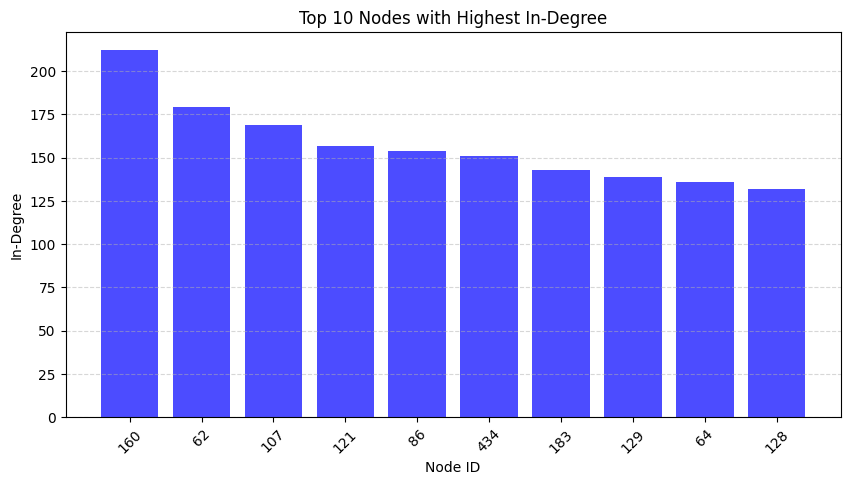

In [11]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'In-Degree' in descending order
sorted_by_in_degree_df = degree_df.sort_values(by='In-Degree', ascending=False)

# Select the top 10 nodes with the highest In-Degree
top_10_in_degree = sorted_by_in_degree_df.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_10_in_degree["NodeID"].astype(str), top_10_in_degree["In-Degree"], color="blue", alpha=0.7)
plt.xlabel("Node ID")
plt.ylabel("In-Degree")
plt.title("Top 10 Nodes with Highest In-Degree")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

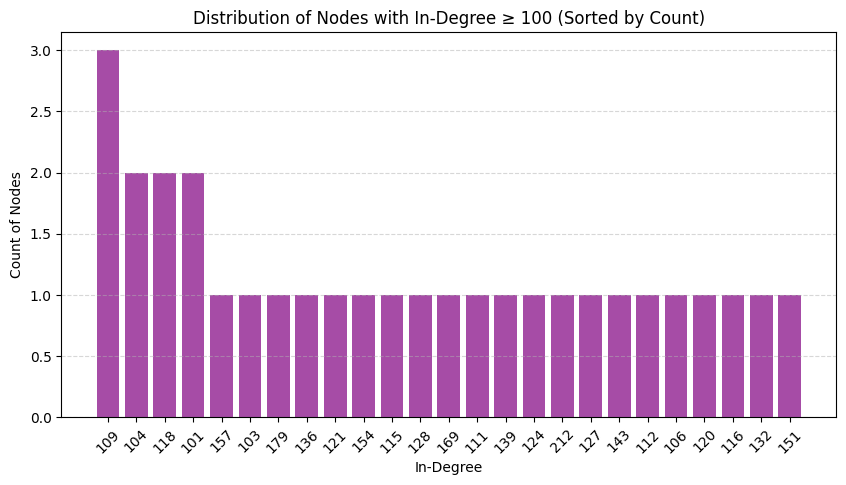

In [16]:
import matplotlib.pyplot as plt

def high_in_degree_distribution(degree_df, threshold=100):
    # Extract nodes with at least the given in-degree threshold
    high_in_degree_nodes = degree_df[degree_df["In-Degree"] >= threshold]

    # Count the distribution of high in-degree values and sort by count
    in_degree_distribution = high_in_degree_nodes["In-Degree"].value_counts()
    
    # Sort by count in descending order for visualization purposes
    in_degree_distribution = in_degree_distribution.sort_values(ascending=False)

    # Convert to list of tuples (in-degree, count)
    in_degree_distribution_tuples = list(zip(in_degree_distribution.index, in_degree_distribution.values))

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.bar(in_degree_distribution.index.astype(str), in_degree_distribution.values, color="purple", alpha=0.7)
    plt.xlabel("In-Degree")
    plt.ylabel("Count of Nodes")
    plt.title(f"Distribution of Nodes with In-Degree ≥ {threshold} (Sorted by Count)")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

    return in_degree_distribution_tuples

# Example usage
in_degree_distribution_result = high_in_degree_distribution(degree_df, threshold=100)

In [21]:
def high_in_degree_nodes_by_department(degree_df, threshold=100):
    # Extract nodes with at least the given in-degree threshold
    high_in_degree_nodes = degree_df[degree_df["In-Degree"] >= threshold]

    # Group nodes by department
    department_nodes = high_in_degree_nodes.groupby("Department")["NodeID"].apply(list)

    # Print the results
    for dept, nodes in department_nodes.items():
        print(f"Department {dept}: {nodes}")

    return department_nodes

# Example usage
high_in_degree_nodes_by_department_result = high_in_degree_nodes_by_department(degree_df, threshold=100)

Department 4: [129, 183, 256, 280]
Department 5: [128]
Department 9: [21]
Department 10: [114]
Department 13: [115]
Department 14: [249]
Department 21: [58, 63]
Department 22: [211]
Department 25: [5, 64]
Department 26: [301, 420]
Department 34: [87, 105, 212, 434]
Department 36: [62, 82, 86, 107, 121, 160, 166, 282, 283]
Department 38: [106]


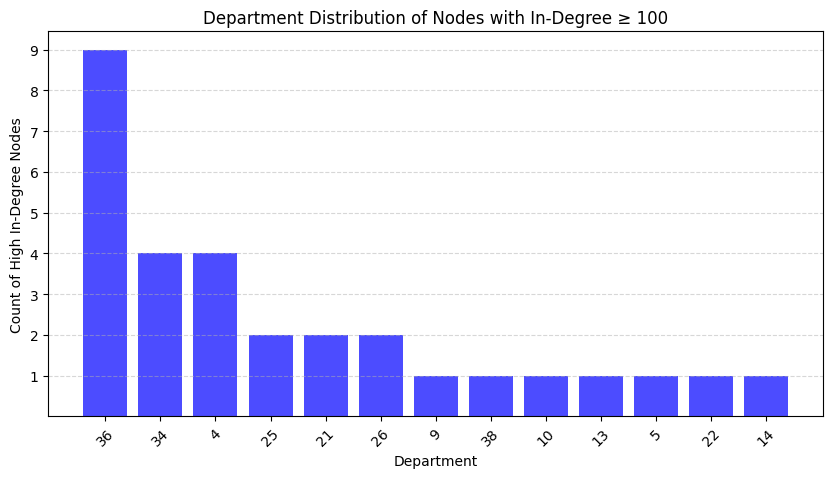

In [20]:
import matplotlib.pyplot as plt

def high_in_degree_department_distribution(degree_df, threshold=100):
    # Extract nodes with at least the given in-degree threshold
    high_in_degree_nodes = degree_df[degree_df["In-Degree"] >= threshold]

    # Count the department distribution among these high in-degree nodes
    department_distribution = high_in_degree_nodes["Department"].value_counts().reset_index()
    department_distribution.columns = ["Department", "Count"]

    # Sort by count in descending order
    department_distribution = department_distribution.sort_values(by="Count", ascending=False)

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.bar(department_distribution["Department"].astype(str), department_distribution["Count"], 
            color="blue", alpha=0.7)
    plt.xlabel("Department")
    plt.ylabel("Count of High In-Degree Nodes")
    plt.title(f"Department Distribution of Nodes with In-Degree ≥ {threshold}")
    plt.xticks(rotation=45)
    plt.yticks(np.arange(1, department_distribution["Count"].max() + 1, 1))  # Show all numbers on Y-axis
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

    return department_distribution

high_in_degree_department_distribution_result = high_in_degree_department_distribution(degree_df, threshold=100)

Department 36 has nine nodes that each have an in-degree of over 100. Departments 34 and 4 each have four nodes with an in-degree higher than 100.

## 4.2 Identifying Most Influential Individuals

- Identifies the most connected nodes.
- Finds those with influence over other key nodes.
- Highlights dominant figures in information flow.

We calculate degree, eigenvector, Katz, and PageRank centralities to determine influence.

In [35]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
# eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
# katz_centrality = nx.katz_centrality_numpy(G, alpha=0.1, beta=1.0)
pagerank = nx.pagerank(G)

**Prints the top N influencers based on a given centrality measure:**

In [36]:
def print_top_influencers(centrality_dict, centrality_name, top_n=10):
    # Sort and display top influential individuals
    top_influencers = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    print(f"Top {top_n} Influencers ({centrality_name}):")
    for node, value in top_influencers:
        print(f"Node {node}: {value}")
    print("\n")

# Calculating unstandardized centralities
degree_unstandardized = {node: dc * 14 for node, dc in degree_centrality.items()}
closeness_unstandardized = {node: cc / 14 for node, cc in closeness_centrality.items()}
betweenness_unstandardized = {node: bc * 91 for node, bc in betweenness_centrality.items()}

print_top_influencers(degree_unstandardized, "Degree Centrality")
print_top_influencers(closeness_unstandardized, "closeness Centrality")
print_top_influencers(betweenness_unstandardized, "betweenness Centrality")
# print_top_influencers(eigenvector_centrality, "Eigenvector Centrality")
# print_top_influencers(katz_centrality, "Katz Centrality")
print_top_influencers(pagerank, "PageRank")

Top 10 Influencers (Degree Centrality):
Node 160: 7.585657370517928
Node 121: 5.256972111553785
Node 107: 5.173306772908367
Node 62: 5.117529880478088
Node 86: 4.936254980079681
Node 82: 4.824701195219123
Node 434: 4.266932270916334
Node 183: 4.183266932270916
Node 5: 3.876494023904382
Node 129: 3.8067729083665336


Top 10 Influencers (closeness Centrality):
Node 160: 0.03211920283653445
Node 62: 0.03119972012683535
Node 107: 0.030938045054803825
Node 434: 0.03060240576576001
Node 121: 0.030543929831175754
Node 86: 0.030216742177029573
Node 64: 0.03010293147203135
Node 129: 0.029933813879491844
Node 183: 0.02989648992203612
Node 128: 0.02980358597572774


Top 10 Influencers (betweenness Centrality):
Node 160: 6.562991533306284
Node 86: 3.4063950031188144
Node 5: 2.455617186174148
Node 121: 2.2324213629452934
Node 62: 2.2305106079439225
Node 107: 1.9890588336460058
Node 64: 1.6985444002869323
Node 82: 1.6588945000429762
Node 377: 1.476062332918574
Node 129: 1.4168214546304927


Top 10 I

We can identifies nodes that appear in the top 5 of each centrality measure:

In [45]:
def get_top_nodes(centrality_dict, top_n=100):
    # Returns the set of top N nodes from a given centrality measure
    return {node for node, _ in sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]}

# Get top 5 nodes from each centrality measure
top_degree = get_top_nodes(degree_centrality)
top_closeness = get_top_nodes(closeness_centrality)
top_betweenness = get_top_nodes(betweenness_centrality)
# top_eigenvector = get_top_nodes(eigenvector_centrality)
# top_katz = get_top_nodes(katz_centrality)
top_pagerank = get_top_nodes(pagerank)

# Find common nodes appearing in the top 100 of all centrality measures (We can add or remove)
common_top_nodes = top_degree & top_pagerank & top_closeness & top_betweenness

print("Nodes appearing in the top 100 of multiple centrality measures:", common_top_nodes)

Nodes appearing in the top 100 of multiple centrality measures: {128, 129, 4, 5, 6, 133, 137, 393, 13, 141, 142, 269, 21, 533, 405, 280, 282, 283, 28, 285, 411, 160, 546, 290, 419, 165, 166, 420, 424, 169, 170, 44, 301, 303, 434, 180, 820, 438, 183, 184, 58, 62, 63, 64, 329, 74, 333, 81, 82, 83, 211, 212, 86, 87, 215, 340, 473, 96, 249, 232, 105, 106, 107, 377, 493, 366, 494, 113, 114, 115, 498, 121, 252}


Now, we can get departments of common top nodes:

In [46]:
common_top_nodes_list = list(common_top_nodes)

# Filter the nodes_df to get departments of these nodes
common_nodes_departments = nodes_df[nodes_df['NodeID'].isin(common_top_nodes_list)]

print("Departments of Common Top Nodes:")
print(common_nodes_departments)
#network robustness
#finding structural equivalents can be insightful and rewarding

Departments of Common Top Nodes:
     NodeID  Department
4         4          21
5         5          25
6         6          25
13       13          26
21       21           9
..      ...         ...
494     494          36
498     498          14
533     533          35
546     546          35
820     820           5

[73 rows x 2 columns]


In [49]:
# Convert set to list for filtering
common_top_nodes_list = list(common_top_nodes)

# Filter the DataFrame to get departments of these top nodes
common_nodes_departments = nodes_df[nodes_df['NodeID'].isin(common_top_nodes_list)]

# Count the number of influential individuals per department
department_counts = common_nodes_departments["Department"].value_counts().reset_index()
department_counts.columns = ["Department", "Count"]

# Sort departments by the number of influential individuals
department_counts = department_counts.sort_values(by="Count", ascending=False)

print(department_counts)

    Department  Count
0           36     13
1            4      8
2           34      5
3           13      5
4           21      4
5           14      4
6           25      3
7           20      3
8           10      3
9           15      3
10          26      3
14          22      2
16          35      2
15           7      2
12          38      2
13           5      2
11           1      2
17          11      1
18           9      1
19           0      1
20          17      1
21           8      1
22           2      1
23          28      1


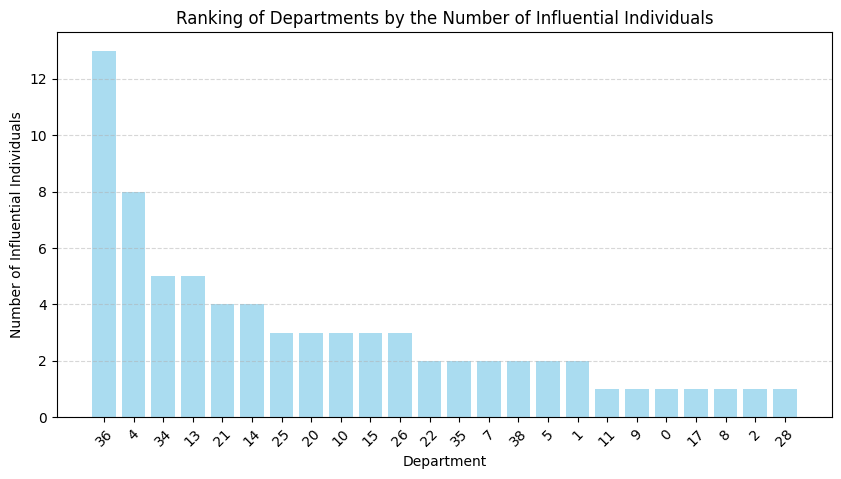

In [52]:
import matplotlib.pyplot as plt

# Visualization of department ranking by influential individuals
plt.figure(figsize=(10, 5))
plt.bar(department_counts["Department"].astype(str), department_counts["Count"], color="skyblue", alpha=0.7)
plt.xlabel("Department")
plt.ylabel("Number of Influential Individuals")
plt.title("Ranking of Departments by the Number of Influential Individuals")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## 4.3 Group Centrality

- Shows which departments are more active in communication.
- Identifies departments with greater influence.

We analyze centrality scores grouped by departments.

In [72]:
# Total number of nodes
number_of_nodes = G.number_of_nodes()
number_of_nodes 

1005

In [73]:
departments = nodes_df["Department"].unique()
departments

array([ 1, 21, 25, 14,  9, 26,  4, 17, 34, 11,  5, 10, 36, 37,  7, 22,  8,
       15,  3, 29, 20, 16, 38, 27, 13,  6,  0, 28,  2, 40, 35, 23, 19, 24,
       32, 31, 39, 12, 30, 41, 18, 33], dtype=int64)

In [74]:
nodes_df.head(1)

NodeID  Department
0       0           1

In [70]:
import networkx as nx
import pandas as pd

# Compute degree centrality for all nodes in the graph
degree_centrality = nx.degree_centrality(G)

# Create a dictionary to store centralization values per department
department_centralization = {}

# Get all departments from nodes_df
departments = nodes_df["Department"].unique()

# Iterate over each department and compute group centralization
for dept in departments:
    # Get all nodes in the department
    group = set(nodes_df[nodes_df["Department"] == dept]["NodeID"])

    if len(group) <= 1:
        # Skip departments with only one node (cannot calculate centralization)
        continue

    # Find max degree centrality in the group
    max_degree_centrality = max(degree_centrality[node] for node in group) * (len(group) - 1)
    # why multiply by (len(group) - 1)? because we want the unstandardized value, which will be the maximum degree (unstandardized)
    
    
    # Compute the numerator: sum of (max centrality - individual centrality)
    numerator = sum(
        (max_degree_centrality - (degree_centrality[node] * (len(group) - 1)))
        for node in group
    )

    # Compute the denominator: max possible centralization in a star-shaped network
    max_degree_denominator = len(group) - 1
    denominator = sum((max_degree_denominator - 1) for _ in range(len(group) - 1))

    # Compute group centralization (avoid division by zero)
    group_centralization = numerator / denominator if denominator > 0 else 0

    # Store in dictionary
    department_centralization[dept] = group_centralization

# Convert to DataFrame and sort results
dept_centralization_df = pd.DataFrame.from_dict(
    department_centralization, orient="index", columns=["Group Centralization"]
).sort_values(by="Group Centralization", ascending=False)

# Display results
print(dept_centralization_df)

    Group Centralization
36              0.387102
4               0.256600
22              0.229906
14              0.228541
34              0.221568
9               0.218924
25              0.210408
5               0.196713
38              0.191778
10              0.183940
21              0.178084
7               0.176742
26              0.173734
20              0.164841
2               0.158865
13              0.152639
15              0.145926
35              0.145599
37              0.144729
28              0.140438
29              0.134794
1               0.132518
12              0.131474
11              0.127047
8               0.124150
40              0.113546
16              0.109389
0               0.103119
23              0.100000
19              0.099934
17              0.096704
24              0.091633
32              0.083096
6               0.075429
27              0.075199
31              0.072875
30              0.062749
3               0.049402
39              0.037849


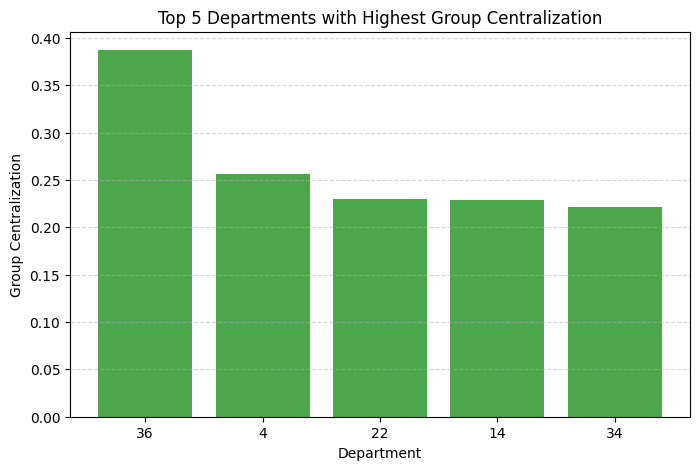

In [71]:
import matplotlib.pyplot as plt

# Exclude department 41 (which has zero centralization) from the lowest group selection
filtered_df = dept_centralization_df[dept_centralization_df["Group Centralization"] > 0]

# Select top 5 departments with highest group centralization
top_5 = dept_centralization_df.head(5)

# Visualization 1: Top 5 departments with highest group centralization
plt.figure(figsize=(8, 5))
plt.bar(top_5.index.astype(str), top_5["Group Centralization"], color="green", alpha=0.7)
plt.xlabel("Department")
plt.ylabel("Group Centralization")
plt.title("Top 5 Departments with Highest Group Centralization")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**High Group Centralization (Top 5 Departments)**
- Departments 36, 4, 22, 14, and 34 have the highest centralization values.
- These departments are more centralized than other departments.
- The values are relatively moderate rather than extreme (e.g., close to 1).
- In a perfectly centralized structure (like a star network), we would expect values close to 1.
- In a perfectly decentralized structure (like a fully connected network), the value would be 0.
- Moderate values (like 0.38, 0.25, 0.22) suggest partial centralization but not strict hierarchy.
- These scores indicate a mix of centralization and distributed communication, meaning:
- A few individuals may dominate communication, but others still contribute.
- The structure is not fully centralized—there is some level of decentralization.
- So there is some level of risk. If these key individuals leave, the department’s communication could be disrupted.

**Departments with the highest group centralization (e.g., Department 36, 4, 22, etc.)**

→ Likely have a more structured communication pattern where certain individuals play key roles,

→ But they are not purely hierarchical—there is still some distributed communication.

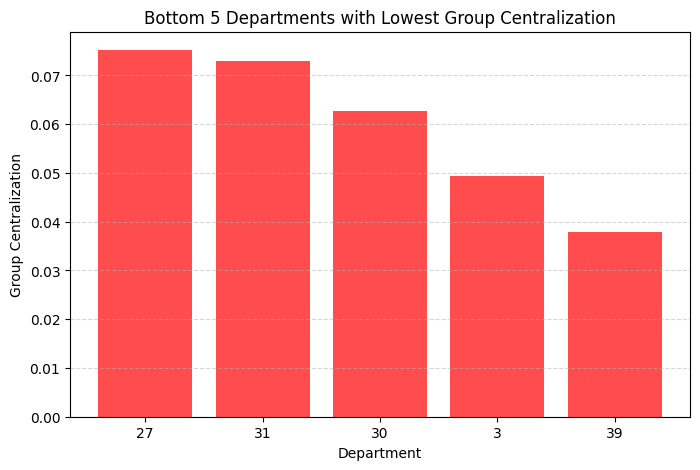

In [73]:
import matplotlib.pyplot as plt

# Exclude department 41 (which has zero centralization) from the lowest group selection
filtered_df = dept_centralization_df[dept_centralization_df["Group Centralization"] > 0]

# Select bottom 5 departments (excluding department 41)
bottom_5 = filtered_df.tail(5)

# Visualization 2: Bottom 5 departments with lowest (nonzero) group centralization
plt.figure(figsize=(8, 5))
plt.bar(bottom_5.index.astype(str), bottom_5["Group Centralization"], color="red", alpha=0.7)
plt.xlabel("Department")
plt.ylabel("Group Centralization")
plt.title("Bottom 5 Departments with Lowest Group Centralization")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**Low Group Centralization (Bottom 5 Departments)**
- Departments 27, 31, 30, 3, and 39 have the lowest group centralization.
- Low group centralization means that communication is more evenly distributed, rather than controlled by a few individuals.
- These departments might have a more decentralized and collaborative structure.
- While this promotes resilience (i.e., communication continues even if one person leaves), it may also indicate inefficiencies in decision-making if communication is too spread out.

# 5. Group Dynamics and Cohesion

## 5.1 Identifying 4-Cliques:

- Identifies tight-knit researcher groups.
- Shows areas of strong collaboration.

`nx.find_cliques(G)` only works for undirected graphs.

In [5]:
import networkx as nx

# Convert directed graph to undirected
G_undirected = G.to_undirected()

# Find all maximal cliques (fully connected subgraphs)
cliques = list(nx.find_cliques(G_undirected))

# Filter cliques where size ≥ n
n = 4  # Change n as needed
n_cliques = [clique for clique in cliques if len(clique) >= n]

# Print results
print(f"Identified {len(n_cliques)} cliques with size ≥ {n}:")
for clique in n_cliques:
    print(clique)


Identified 41690 cliques with size ≥ 4:
[0, 65, 177, 64]
[0, 65, 177, 380, 377]
[0, 65, 177, 380, 178]
[0, 65, 498, 64]
[0, 65, 498, 178]
[0, 65, 581, 101]
[0, 65, 101, 380]
[0, 6, 64, 5]
[0, 6, 377, 316]
[0, 101, 120, 380]
[0, 103, 64, 215]
[0, 103, 377, 250, 368]
[0, 103, 377, 283, 368]
[0, 103, 377, 283, 380]
[0, 103, 377, 283, 215]
[0, 103, 18, 215]
[0, 74, 64, 177, 309, 215, 5]
[0, 74, 64, 177, 309, 215, 223]
[0, 74, 64, 177, 166, 223]
[0, 74, 64, 498]
[0, 74, 64, 222, 223, 309, 215]
[0, 74, 64, 222, 223, 166]
[0, 74, 218, 560, 215, 221, 313, 73, 223]
[0, 74, 218, 560, 215, 221, 316, 73, 223]
[0, 74, 218, 560, 215, 221, 316, 459, 222, 1]
[0, 74, 218, 560, 215, 221, 316, 459, 222, 223]
[0, 74, 218, 17, 120, 18, 309]
[0, 74, 218, 17, 297, 309, 215, 73, 248]
[0, 74, 218, 17, 297, 309, 215, 73, 316]
[0, 74, 218, 17, 297, 309, 215, 177]
[0, 74, 218, 17, 221, 226, 223, 313, 309]
[0, 74, 218, 17, 221, 226, 223, 222, 459, 166]
[0, 74, 218, 17, 221, 226, 223, 222, 309]
[0, 74, 218, 17, 221

We analyze k-cores and strongly connected components.

In [75]:
# Find k-cores (subgroups where each node has at least k edges)
k_core = nx.k_core(G, k=3)

# Find strongly connected components
strong_components = list(nx.strongly_connected_components(G))

print("Number of Strongly Connected Components:", len(strong_components))
print("Largest k-core (k=3):", k_core.number_of_nodes(), "nodes")

Number of Strongly Connected Components: 203
Largest k-core (k=3): 864 nodes


**Potential Issue:** Since there are self-Loops in the Graph.

If we don't remove the self-loops, we will get the error because `nx.k_core(G, k=3)` does not support graphs with self-loops (edges where a node connects to itself, e.g., (5,5)).

**Solution:**

- Before computing the k-core, remove all self-loops from the graph:

- Self-loops increase the degree of a node but do not contribute to actual connectivity between different nodes.
- The k-core algorithm is designed for inter-node connectivity, so it fails when self-loops are present.

## 5.2 K-plexes:

- Each detected k-plex has at least 5 nodes
- Each node in a k-plex is connected to at least: 5 - 2 = 3
- Each k-plex found in your results is a group of nodes where every node is connected to at least 3 other nodes in that same group.
- This means the structure is more relaxed than a clique but still relatively well-connected.

In [82]:
import networkx as nx
import pandas as pd

def fast_maximal_k_plex(G, k=2, min_size=3):
    """
    Fast k-plex detection with maximality enforcement and overlap support.

    Parameters:
    G (networkx.Graph): The input undirected graph
    k (int): Allowed missing connections per node
    min_size (int): Minimum size of k-plex

    Returns:
    list of sets: List of detected k-plexes
    """
    UG = G.to_undirected()  # Ensure the graph is undirected
    nodes = set(UG.nodes())
    k_plexes = []

    while nodes:
        seed = max(nodes, key=lambda n: UG.degree(n))  # Start with highest-degree node
        candidate_plex = {seed}

        # Expand the plex greedily
        for neighbor in UG.neighbors(seed):
            candidate_plex.add(neighbor)
            if all(UG.degree(n) >= len(candidate_plex) - k for n in candidate_plex):
                continue
            else:
                candidate_plex.remove(neighbor)

        # **NEW: Enforce maximality by checking for additional nodes**
        additional_nodes = set(UG.nodes()) - candidate_plex
        for node in additional_nodes:
            if all(UG.degree(n) >= len(candidate_plex | {node}) - k for n in (candidate_plex | {node})):
                candidate_plex.add(node)  # Expand k-plex if valid

        # Only keep if it meets min_size
        if len(candidate_plex) >= min_size:
            k_plexes.append(candidate_plex)

        # Remove only the seed node to allow other nodes to be used in overlaps
        nodes.remove(seed)

    return k_plexes

# Run on your network
k_plexes = fast_maximal_k_plex(G, k=2, min_size=5)

# Convert results to DataFrame
df_kplexes = pd.DataFrame({"K-Plexes": [list(plex) for plex in k_plexes]})

print("Detected Maximal K-Plexes (Allowing Overlaps):")
print(df_kplexes.to_string(index=False))


Detected Maximal K-Plexes (Allowing Overlaps):
                                                                                                                                                                                                                                             K-Plexes
                                                                                                  [2, 4, 8, 12, 15, 17, 18, 19, 20, 21, 23, 28, 30, 41, 42, 44, 47, 51, 55, 57, 58, 59, 61, 63, 68, 69, 79, 81, 82, 83, 84, 85, 87, 92, 96, 105, 160]
                                                                                                                                         [4, 10, 12, 16, 17, 18, 19, 21, 23, 27, 30, 31, 35, 36, 41, 44, 46, 58, 63, 66, 68, 74, 77, 80, 81, 82, 121]
                                                              [256, 4, 5, 10, 12, 15, 17, 531, 20, 21, 23, 283, 285, 30, 31, 546, 552, 44, 46, 51, 53, 58, 62, 63, 68, 80, 81, 82, 83, 84, 86, 105, 366, 121, 393, 153,

The question is are those K-plexes Maximal?

In [84]:
# Step 1: Run k-plex detection
k_plexes = fast_maximal_k_plex(G, k=2, min_size=5)

# Step 2: Convert results to DataFrame
df_kplexes = pd.DataFrame({"K-Plexes": [list(plex) for plex in k_plexes]})

# Step 3: Check if each k-plex is maximal
def is_maximal_k_plex(G, k_plex, k):
    """
    Check if a given k-plex is maximal in the graph G.
    
    Parameters:
    G (networkx.Graph): The input undirected graph
    k_plex (set): A detected k-plex
    k (int): The k-plex parameter

    Returns:
    bool: True if maximal, False otherwise
    """
    outside_nodes = set(G.nodes()) - k_plex
    
    for node in outside_nodes:
        # Check if adding the node keeps the k-plex condition
        extended_plex = k_plex | {node}  # Add the node to the k-plex
        if all(G.degree(n) >= len(extended_plex) - k for n in extended_plex):
            return False  # Not maximal, since we could add this node
    
    return True  # Maximal if no additional node can be added

# Step 4: Check maximality for each detected k-plex
maximal_results = []
for i, k_plex in enumerate(df_kplexes["K-Plexes"]):
    k_plex_set = set(k_plex)
    is_maximal = is_maximal_k_plex(G, k_plex_set, k=2)  # Adjust k as needed
    maximal_results.append({"K-Plex Index": i, "Is Maximal": is_maximal})

# Step 5: Convert to DataFrame and print results
df_maximality = pd.DataFrame(maximal_results)
print("Maximality Check for Detected K-Plexes:")
print(df_maximality.to_string(index=False))


Maximality Check for Detected K-Plexes:
 K-Plex Index  Is Maximal
            0       False
            1       False
            2       False
            3       False
            4       False
            5       False
            6       False
            7       False
            8       False
            9       False
           10       False
           11       False
           12       False
           13       False
           14       False
           15       False
           16       False
           17       False
           18       False
           19       False
           20       False
           21       False
           22       False
           23       False
           24       False
           25       False
           26       False
           27       False
           28       False
           29       False
           30       False
           31       False
           32       False
           33       False
           34       False
           35       Fals

In [85]:
import pandas as pd

# Extract only the maximal k-plexes
df_maximal_kplexes = df_kplexes[df_maximality["Is Maximal"]]

# Print the maximal k-plexes
print("Maximal K-Plexes:")
print(df_maximal_kplexes.to_string(index=False))

Maximal K-Plexes:
                                                                                                                         K-Plexes
                                                                   [2, 3, 4, 520, 457, 971, 859, 412, 804, 361, 812, 59, 188, 63]
                              [2, 3, 4, 520, 665, 412, 285, 286, 160, 174, 58, 59, 571, 62, 63, 193, 194, 195, 586, 81, 107, 114]
             [2, 3, 4, 5, 6, 132, 520, 137, 408, 412, 160, 685, 303, 305, 54, 55, 56, 57, 58, 59, 63, 194, 586, 89, 96, 481, 738]
            [133, 134, 14, 143, 160, 419, 165, 423, 41, 301, 47, 48, 437, 438, 318, 450, 74, 331, 78, 79, 593, 340, 218, 93, 482]
                                     [0, 1, 268, 19, 160, 295, 311, 316, 73, 74, 459, 84, 212, 215, 218, 221, 222, 223, 227, 106]
                                                                      [256, 65, 257, 4, 401, 84, 86, 664, 90, 285, 425, 426, 121]
                                                                      [0

In [86]:
df_maximal_kplexes

K-Plexes
61   [2, 3, 4, 520, 457, 971, 859, 412, 804, 361, 8...
62   [2, 3, 4, 520, 665, 412, 285, 286, 160, 174, 5...
197  [2, 3, 4, 5, 6, 132, 520, 137, 408, 412, 160, ...
245  [133, 134, 14, 143, 160, 419, 165, 423, 41, 30...
308  [0, 1, 268, 19, 160, 295, 311, 316, 73, 74, 45...
..                                                 ...
846                             [0, 911, 81, 189, 222]
849                            [0, 333, 113, 114, 983]
850                             [0, 66, 333, 984, 153]
851                            [0, 261, 470, 986, 411]
852                              [0, 997, 24, 953, 27]

[118 rows x 1 columns]

In [87]:
from itertools import combinations

# Ensure K-Plexes are stored as sets for efficient intersection
df_maximal_kplexes["K-Plexes"] = df_maximal_kplexes["K-Plexes"].apply(set)

# Store overlap results
overlap_results = []

# Iterate over all pairs of K-Plexes
for (i, row1), (j, row2) in combinations(df_maximal_kplexes.iterrows(), 2):
    plex1, plex2 = row1["K-Plexes"], row2["K-Plexes"]
    common_nodes = plex1.intersection(plex2)
    
    if len(common_nodes) > 0:  # Ensure multiple overlaps are detected
        overlap_results.append({
            "K-Plex 1": i,
            "K-Plex 2": j,
            "Common Nodes": list(common_nodes),
            "Overlap Size": len(common_nodes)  # Count actual overlap size
        })

# Convert to DataFrame
df_maximal_kplex_overlaps = pd.DataFrame(overlap_results)

# Print the overlap results
# Display only the first 50 overlaps to prevent Jupyter from crashing
print("Overlapping K-Plexes and Common Nodes (First 50 Results):")
print(df_maximal_kplex_overlaps.head(50).to_string(index=False))

Overlapping K-Plexes and Common Nodes (First 50 Results):
 K-Plex 1  K-Plex 2                                    Common Nodes  Overlap Size
       61        62                     [2, 3, 4, 520, 59, 412, 63]             7
       61       197                     [2, 3, 4, 520, 59, 412, 63]             7
       61       327                                             [4]             1
       61       343                                 [2, 4, 812, 63]             4
       61       444                             [2, 4, 59, 412, 63]             5
       61       469                                             [2]             1
       61       524                              [2, 3, 4, 520, 63]             5
       61       637                                           [804]             1
       61       642                                      [971, 804]             2
       61       647                                      [3, 4, 63]             3
       61       711                     

C:\Users\alire\AppData\Local\Temp\ipykernel_10540\1000807853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maximal_kplexes["K-Plexes"] = df_maximal_kplexes["K-Plexes"].apply(set)


In [104]:
import pandas as pd

# Ensure node-to-department mapping is available
node_department_mapping = nodes_df.set_index("NodeID")["Department"].to_dict()

# Convert 'Common Nodes' column from string to list if needed
if isinstance(df_maximal_kplex_overlaps["Common Nodes"].iloc[0], str):
    df_maximal_kplex_overlaps["Common Nodes"] = df_maximal_kplex_overlaps["Common Nodes"].apply(eval)

# Extract department information for overlapping nodes
df_maximal_kplex_overlaps["Departments"] = df_maximal_kplex_overlaps["Common Nodes"].apply(
    lambda nodes: [node_department_mapping.get(node, "Unknown") for node in nodes]
)

# Create a new DataFrame with department data for overlapping k-plexes
df_overlap_departments = df_maximal_kplex_overlaps[["K-Plex 1", "K-Plex 2", "Departments", "Overlap Size"]]

# Print a preview of the new DataFrame
print("Overlapping K-Plex Departments:")
df_overlap_departments

Overlapping K-Plex Departments:


K-Plex 1  K-Plex 2                   Departments  Overlap Size
0           61        62  [21, 21, 21, 21, 21, 21, 21]             7
1           61       197  [21, 21, 21, 21, 21, 21, 21]             7
2           61       327                          [21]             1
3           61       343              [21, 21, 32, 21]             4
4           61       444          [21, 21, 21, 21, 21]             5
...        ...       ...                           ...           ...
4874       849       851                           [1]             1
4875       849       852                           [1]             1
4876       850       851                           [1]             1
4877       850       852                           [1]             1
4878       851       852                           [1]             1

[4879 rows x 4 columns]

In [105]:
from collections import Counter
import pandas as pd

# Count the total number of overlaps per department
department_overlap_counts = Counter(dept for dept_list in df_overlap_departments["Departments"] for dept in dept_list)

# Convert to a DataFrame
df_department_overlap_counts = pd.DataFrame.from_dict(department_overlap_counts, orient='index', columns=['Total Overlaps'])

# Reset index and rename columns
df_department_overlap_counts = df_department_overlap_counts.reset_index().rename(columns={"index": "Department"})

# Sort by the number of overlaps in descending order
df_department_overlap_counts = df_department_overlap_counts.sort_values(by="Total Overlaps", ascending=False)

# Print the results
print("Departments with the Most Overlaps:")
print(df_department_overlap_counts.head())

Departments with the Most Overlaps:
    Department  Total Overlaps
10           1            4457
3           36             275
0           21             226
11           4             203
21           7             175


In [90]:
import pandas as pd

# Step 1: Load node attributes (Ensure this CSV exists)
# nodes_df = pd.read_csv("email_Eu_core_department_labels.csv")  # Update file path if needed

# Step 2: Create a mapping of NodeID to Department
node_department_mapping = nodes_df.set_index("NodeID")["Department"].to_dict()

# Step 3: Replace each node in k-plexes with its department
df_maximal_kplexes["Department K-Plexes"] = df_maximal_kplexes["K-Plexes"].apply(
    lambda k_plex: [node_department_mapping.get(node, "Unknown") for node in k_plex]
)

# Step 4: Create a new DataFrame with department-based k-plexes
df_department_kplexes = df_maximal_kplexes[["Department K-Plexes"]]

# # Step 5: Save to a new CSV file
# df_department_kplexes.to_csv("department_kplexes.csv", index=False)

# # Step 6: Print confirmation
# print("Department-based k-plexes saved to department_kplexes.csv")

# Step 7: Print a preview of the new DataFrame
print(df_department_kplexes.head())

Department-based k-plexes saved to department_kplexes.csv
                                   Department K-Plexes
61   [21, 21, 21, 14, 21, 4, 10, 32, 32, 21, 15, 32...
62   [21, 21, 21, 21, 32, 21, 22, 21, 36, 32, 21, 2...
197  [21, 21, 21, 25, 25, 28, 21, 21, 21, 21, 36, 2...
245  [4, 2, 4, 8, 36, 4, 13, 10, 5, 26, 10, 10, 13,...
308  [1, 1, 39, 14, 36, 7, 1, 1, 1, 1, 1, 37, 34, 1...


C:\Users\alire\AppData\Local\Temp\ipykernel_10540\1460248174.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maximal_kplexes["Department K-Plexes"] = df_maximal_kplexes["K-Plexes"].apply(


In [92]:
import pandas as pd
from collections import Counter

# Ensure df_department_kplexes exists
if "df_department_kplexes" not in locals():
    df_department_kplexes = pd.read_csv("department_kplexes.csv")  # Load from file if needed

# Ensure the column contains lists (convert only if it's stored as a string)
if isinstance(df_department_kplexes["Department K-Plexes"].iloc[0], str):
    df_department_kplexes["Department K-Plexes"] = df_department_kplexes["Department K-Plexes"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Get unique department values (column names)
unique_departments = sorted(set(dept for kplex in df_department_kplexes["Department K-Plexes"] for dept in kplex))

# Function to count department occurrences in each k-plex
def count_departments(k_plex):
    counts = Counter(k_plex)
    return [counts.get(dept, 0) for dept in unique_departments]

# Apply function to create a DataFrame with department counts
df_department_counts = pd.DataFrame(df_department_kplexes["Department K-Plexes"].apply(count_departments).tolist(), columns=unique_departments)

# Add K-Plex index for reference
df_department_counts.insert(0, "K-Plex Index", df_department_kplexes.index)

# # Save to CSV
# df_department_counts.to_csv("department_kplex_counts.csv", index=False)

# # Print confirmation
# print("Department K-Plex Counts saved to department_kplex_counts.csv")

# Print a preview
print(df_department_counts.head())


Department K-Plex Counts saved to department_kplex_counts.csv
   K-Plex Index  0   1  2  3  4  5  6  7  8  ...  31  32  33  34  35  36  37  \
0            61  0   0  0  0  1  0  0  0  0  ...   0   3   0   0   0   0   0   
1            62  0   0  0  0  0  0  0  0  0  ...   0   2   0   0   0   3   0   
2           197  0   0  0  0  0  0  0  0  0  ...   0   0   0   0   0   1   0   
3           245  0   2  3  2  5  2  0  0  1  ...   0   0   0   0   0   1   0   
4           308  0  13  0  0  0  0  0  1  0  ...   0   0   0   1   0   1   1   

   38  39  40  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   1   0  
4   1   1   0  

[5 rows x 42 columns]


In [93]:
df_department_counts.head()

K-Plex Index  0   1  2  3  4  5  6  7  8  ...  31  32  33  34  35  36  37  \
0            61  0   0  0  0  1  0  0  0  0  ...   0   3   0   0   0   0   0   
1            62  0   0  0  0  0  0  0  0  0  ...   0   2   0   0   0   3   0   
2           197  0   0  0  0  0  0  0  0  0  ...   0   0   0   0   0   1   0   
3           245  0   2  3  2  5  2  0  0  1  ...   0   0   0   0   0   1   0   
4           308  0  13  0  0  0  0  0  1  0  ...   0   0   0   1   0   1   1   

   38  39  40  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   1   0  
4   1   1   0  

[5 rows x 42 columns]

In [97]:
import pandas as pd

# # Ensure df_department_counts is available (Reload if necessary)
# df_department_counts = pd.read_csv("department_kplex_counts.csv")  # Load from file if needed

# Calculate the total number of times each department appears across all k-plexes
department_totals = df_department_counts.drop(columns=["K-Plex Index"]).sum().sort_values(ascending=False)

# Convert to a DataFrame for ranking
df_department_totals = pd.DataFrame({
    "Department": department_totals.index,
    "Total Appearances": department_totals.values
})

# # Save to CSV
# df_department_totals.to_csv("department_totals_ranked.csv", index=False)

df_department_totals.head()

Department  Total Appearances
0          1                167
1          4                132
2         21                101
3          0                 92
4         36                 82

Even though Department 36 has many influential people, they may not be represented in the various cohesive subgroups. In fact, department 1 ranks at the top. However, we can see that 36 is in the top five Departments here.

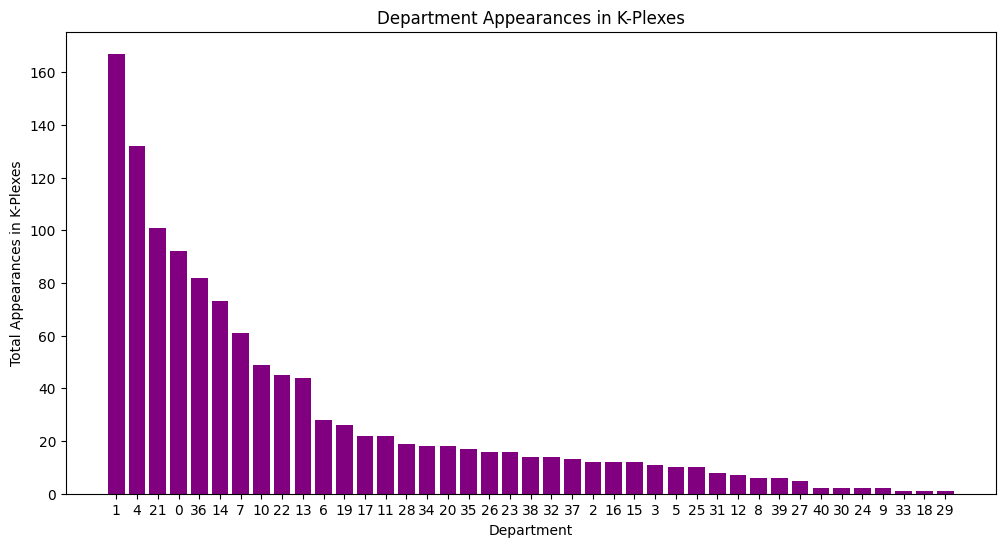

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure df_department_totals is available (reload if necessary)
df_department_totals = pd.read_csv("department_totals_ranked.csv")  # Load from file if needed

# Plot the department appearance frequencies
plt.figure(figsize=(12, 6))
plt.bar(df_department_totals["Department"].astype(str), df_department_totals["Total Appearances"], color="purple")

# Labels and title
plt.xlabel("Department")
plt.ylabel("Total Appearances in K-Plexes")
plt.title("Department Appearances in K-Plexes")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Show the plot
plt.show()

**K-core:**

- A k-core of a graph is the maximal subgraph in which every vertex has at least degree k. In simpler terms, every vertex is connected to at least k other vertices within that subgraph.   
- This is a strict minimum degree requirement.

**K-plex:**

- A k-plex is a relaxed clique where each node is allowed to miss up to k-1 connections.   
- Essentially, it allows for a certain number of "missing" connections.   

**Restrictiveness:**
- K-core is generally considered more restrictive. It demands a strict minimum degree for every vertex.
- K-plex is a relaxation. It allows for a degree of flexibility by allowing a vertex to not be connected to a certain number of other vertices within the subgraph.
- Therefore, K-core is more restrictive than K-plex.

## 5.3 K-Core

A k-core is a subgraph in which each node is adjacent to at least a minimum number, k.

The k-core is not defined for multigraphs or graphs with self loops.

It returns a single subgraph, specifically the maximal k-core of the given graph G for the specified k value

In [69]:
core_50 = list(nx.k_core(G, k=50))
print(core_50)

[2, 3, 4, 5, 6, 518, 520, 13, 16, 17, 531, 20, 21, 533, 23, 28, 30, 546, 41, 42, 44, 46, 54, 56, 57, 58, 59, 62, 63, 64, 68, 74, 80, 81, 82, 83, 84, 86, 87, 89, 96, 615, 105, 106, 107, 113, 114, 115, 116, 121, 128, 129, 131, 132, 133, 137, 142, 145, 147, 152, 153, 154, 155, 160, 163, 165, 166, 169, 170, 172, 173, 174, 685, 180, 183, 184, 187, 209, 210, 211, 212, 215, 226, 233, 236, 243, 249, 252, 254, 255, 256, 263, 269, 271, 280, 281, 282, 283, 285, 286, 290, 809, 300, 301, 812, 303, 305, 820, 329, 333, 338, 340, 859, 355, 357, 362, 363, 366, 367, 371, 375, 393, 404, 405, 408, 411, 412, 419, 420, 932, 422, 424, 427, 434, 438, 473, 474, 481, 493, 494, 495]


In [70]:
len(core_50)

141

Our k-core analysis on a research institution's network with k=50 resulted in 141 researchers forming a strongly connected subgraph, meaning:

- These researchers have at least 50 direct connections (collaborations, co-authorships, or communication links).
- They represent the most well-connected core of the institution's research network.
- They are likely highly active, influential, or central in collaborative research.

These Are the Most Collaborative Researchers
- These 141 researchers form the most interconnected, highly engaged core of the institution.
- They likely collaborate frequently across departments and act as a source of information.
- Faculty with 50+ connections are often senior researchers, administrators, or interdisciplinary collaborators.

- Since 141 researchers remain in the k-core at k=50, it suggests that a large portion of the institution's researchers are well connected.
- This indicates good institutional collaboration and a strong internal research network.

- These researchers come from multiple departments, it means they are cross-disciplinary collaborators.

- We could analyze department distribution to confirm if this k-core represents interdisciplinary teams.

In [71]:
# Assuming 'department' is an attribute of each node
department_counts = {}
for node in core_50:
    dept = G.nodes[node].get('department', 'Unknown')
    department_counts[dept] = department_counts.get(dept, 0) + 1

print(department_counts)

{21: 16, 25: 3, 35: 9, 26: 3, 34: 7, 1: 4, 3: 1, 9: 2, 11: 3, 5: 3, 14: 3, 17: 2, 22: 5, 36: 14, 15: 6, 29: 1, 37: 2, 20: 4, 38: 4, 10: 5, 13: 7, 4: 9, 28: 4, 23: 2, 27: 2, 24: 1, 32: 3, 0: 1, 19: 5, 40: 1, 6: 1, 8: 3, 2: 1, 16: 2, 7: 1, 12: 1}


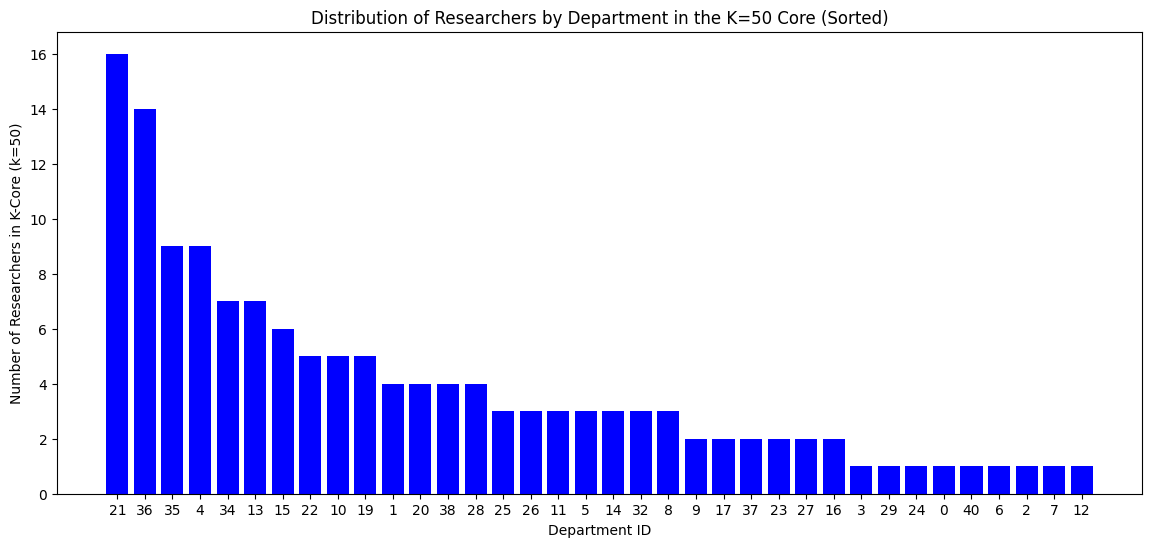

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Sort departments by count (largest to smallest)
sorted_departments = sorted(department_counts.items(), key=lambda x: x[1], reverse=True)
departments, counts = zip(*sorted_departments)

# Create bar chart
plt.figure(figsize=(14, 6))
plt.bar(range(len(departments)), counts, color='blue', align='center')

# Set x-axis ticks and labels for all department IDs
plt.xticks(ticks=np.arange(len(departments)), labels=departments, rotation=0)

# Labels and title
plt.xlabel("Department ID")
plt.ylabel("Number of Researchers in K-Core (k=50)")
plt.title("Distribution of Researchers by Department in the K=50 Core (Sorted)")
plt.show()

**Who Are the Key Players?**

Researchers in the k=50 core are likely leaders in research, such as:

- Department Heads
- Senior Researchers

If we check their degree (number of connections), we can rank the most influential researchers:

In [78]:
core_degrees = [(node, G.degree(node)) for node in core_50]
top_researchers = sorted(core_degrees, key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Most Connected Researchers in K=50 Core:")
for researcher in top_researchers:
    print(researcher)

Top 10 Most Connected Researchers in K=50 Core:
(160, 544)
(121, 377)
(107, 371)
(62, 367)
(86, 354)
(82, 346)
(434, 306)
(183, 300)
(5, 278)
(129, 273)


For instance, node 160 has the total in-degree and out-degree of 544:

In [84]:
node_id = 160

# In-degree (number of incoming edges)
in_degree = G.in_degree(node_id)
print(f"In-degree of node {node_id}: {in_degree}")

# Out-degree (number of outgoing edges)
out_degree = G.out_degree(node_id)
print(f"Out-degree of node {node_id}: {out_degree}")

# Total degree (sum of in-degree and out-degree)
total_degree = in_degree + out_degree
print(f"Total degree of node {node_id}: {total_degree}")

In-degree of node 160: 211
Out-degree of node 160: 333
Total degree of node 160: 544


What Happens If We Increase k?

If we increase k toward 60, we can see who remains in even denser collaborations:

In [95]:
for k in range(50, 80, 1):
    k_core_size = len(nx.k_core(G, k).nodes())
    print(f"{k}-core has {k_core_size} researchers")


50-core has 141 researchers
51-core has 138 researchers
52-core has 129 researchers
53-core has 107 researchers
54-core has 101 researchers
55-core has 97 researchers
56-core has 0 researchers
57-core has 0 researchers
58-core has 0 researchers
59-core has 0 researchers
60-core has 0 researchers
61-core has 0 researchers
62-core has 0 researchers
63-core has 0 researchers
64-core has 0 researchers
65-core has 0 researchers
66-core has 0 researchers
67-core has 0 researchers
68-core has 0 researchers
69-core has 0 researchers
70-core has 0 researchers
71-core has 0 researchers
72-core has 0 researchers
73-core has 0 researchers
74-core has 0 researchers
75-core has 0 researchers
76-core has 0 researchers
77-core has 0 researchers
78-core has 0 researchers
79-core has 0 researchers


------

# 6. Information Flow and Reciprocity

## 6.1 Measuring Reciprocity
- Reciprocity measures mutual exchanges of emails.
- High reciprocity indicates equal participation, low reciprocity suggests one-way communication.

We determine how frequently communication is bidirectional.

In [29]:
reciprocity = nx.reciprocity(G)
print("Network Reciprocity:", reciprocity)

Network Reciprocity: 0.7112198644149385


- A reciprocity of 1 means that every email exchange is bidirectional (everyone who sends an email also receives one from the same person).
- A reciprocity of 0 means that all emails are one-way (no one responds to the emails they receive).

0.71 suggests that:

- Strong mutual communication: The network exhibits a high level of balanced interaction, meaning researchers tend to reply to each other’s emails frequently.
- Not fully symmetrical: About 28.88% of the interactions are one-sided, meaning there are some hierarchical structures or cases where emails are not reciprocated.

**Possible explanations for non-reciprocal communication:**
- **Hierarchy in the organization** – Some researchers (e.g., senior staff or administrators) may receive many emails but respond less often.
- Automated or announcement emails – Some emails may be mass communications that do not require replies.

Therefore, We need to examine the presence of hierarchical communication.

# 7. Identifying Hierarchical Communication Patterns

- Identifies individuals who receive more emails than they send (potential managers).

To assess hierarchy, we find nodes with a high in-degree but low out-degree:

In [94]:
# Find nodes with a high in-degree but low out-degree (indicating hierarchy)
hierarchical_nodes = {node: (G.in_degree(node), G.out_degree(node)) for node in G.nodes if G.in_degree(node) > 3 * G.out_degree(node)
                      and G.in_degree(node) >= 10}

print("Potential Hierarchical Nodes:")
hierarchical_nodes

Potential Hierarchical Nodes:


{1: (50, 0),
 78: (23, 0),
 119: (13, 1),
 130: (35, 0),
 203: (39, 0),
 208: (51, 8),
 219: (18, 2),
 227: (18, 0),
 228: (22, 1),
 239: (11, 0),
 296: (69, 20),
 313: (16, 5),
 319: (10, 0),
 365: (89, 1),
 384: (16, 0),
 396: (14, 1),
 421: (47, 15),
 468: (21, 0),
 501: (14, 1),
 505: (13, 0),
 514: (10, 2),
 517: (12, 3),
 532: (19, 0),
 555: (15, 3),
 558: (11, 3),
 571: (20, 0),
 575: (11, 0),
 576: (19, 0),
 586: (25, 0),
 618: (12, 3),
 624: (11, 1),
 643: (13, 3),
 654: (37, 6),
 656: (11, 0),
 672: (12, 3),
 714: (22, 7),
 725: (12, 3),
 728: (16, 4),
 734: (13, 2),
 758: (13, 1),
 789: (10, 3),
 804: (12, 0),
 950: (45, 9),
 987: (12, 0),
 990: (20, 2)}

**Example:**

`1: (50, 0), 130: (35, 0), 365: (89, 1)`

- These nodes only receive emails and never send any.
- hese are likely high-ranking figures, decision-makers, or notification accounts.

`208: (51, 8), 421: (47, 15), 950: (45, 9)`
- These could be senior researchers or team leads who occasionally reply but mostly receive emails.

# 8. Network Robustness

## 8.1 Impact of Node Removal (High Betweenness Centrality Vs. Random)

- Determines network resilience.
- Tests if removing key individuals disrupts communication.

We check how removing key nodes affects connectivity.

In [32]:
# Remove top influencer and check changes
G_removed = G.copy()
G_removed.remove_node(top_influencers[0][0])

# Compute new number of connected components
new_components = nx.number_strongly_connected_components(G_removed)

print("Change in Strongly Connected Components after removal:", new_components)

Change in Strongly Connected Components after removal: 205


In [98]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_unstandardized = {node: bc * 91 for node, bc in betweenness_centrality.items()}

1. Now we identify the Highest Betweenness Nodes:

In [106]:
# Sort nodes by betweenness centrality (highest first)
top_nodes = sorted(betweenness_unstandardized.items(), key=lambda x: x[1], reverse=True)[:50]

# Print top 50 highest betweenness nodes
print("Top 50 Highest Betweenness Nodes:")
for node, centrality in top_nodes:
    print(f"Node {node}: Betweenness Centrality = {centrality:.4f}")

Top 50 Highest Betweenness Nodes:
Node 160: Betweenness Centrality = 6.5630
Node 86: Betweenness Centrality = 3.4064
Node 5: Betweenness Centrality = 2.4556
Node 121: Betweenness Centrality = 2.2324
Node 62: Betweenness Centrality = 2.2305
Node 107: Betweenness Centrality = 1.9891
Node 64: Betweenness Centrality = 1.6985
Node 82: Betweenness Centrality = 1.6589
Node 377: Betweenness Centrality = 1.4761
Node 129: Betweenness Centrality = 1.4168
Node 183: Betweenness Centrality = 1.3610
Node 434: Betweenness Centrality = 1.3445
Node 166: Betweenness Centrality = 1.2700
Node 211: Betweenness Centrality = 1.2459
Node 533: Betweenness Centrality = 1.1732
Node 21: Betweenness Centrality = 1.1511
Node 6: Betweenness Centrality = 1.1497
Node 44: Betweenness Centrality = 1.0745
Node 333: Betweenness Centrality = 1.0459
Node 301: Betweenness Centrality = 1.0356
Node 13: Betweenness Centrality = 0.9826
Node 820: Betweenness Centrality = 0.9635
Node 96: Betweenness Centrality = 0.9358
Node 128: Be

2. We remove High Betweenness Nodes and Analyze Network Changes:

In [107]:
def remove_nodes_and_check_robustness(G, nodes_to_remove):
    G_copy = G.copy()
    G_copy.remove_nodes_from(nodes_to_remove)
    
    # Convert to undirected graph before finding connected components
    G_undirected2 = G_copy.to_undirected()

    # Compute new largest connected component (GCC)
    largest_cc = max(nx.connected_components(G_undirected2), key=len)
    gcc_size = len(largest_cc) / G.number_of_nodes()  # Fraction of remaining network
    return gcc_size

# Remove top 10 highest betweenness nodes
top_10_nodes = [node for node, _ in top_nodes]
gcc_after_removal = remove_nodes_and_check_robustness(G, top_10_nodes)

print(f"Network robustness after removing top 50 nodes: {gcc_after_removal:.4f}")

Network robustness after removing top 10 nodes: 0.8965


In [108]:
import random

def random_node_removal(G, fraction=0.05):
    G_copy = G.copy()
    nodes_to_remove = random.sample(list(G.nodes()), int(fraction * G.number_of_nodes()))
    G_copy.remove_nodes_from(nodes_to_remove)
    G_undirected2 = G_copy.to_undirected()
    
    # Compute new largest connected component (GCC)
    largest_cc = max(nx.connected_components(G_undirected2), key=len)
    return len(largest_cc) / G.number_of_nodes()

# Compare removing 5% of nodes randomly vs. top 10 betweenness nodes
gcc_random = random_node_removal(G, fraction=0.05)

print(f"GCC after random failures: {gcc_random:.4f}")
print(f"GCC after targeted attack (top betweenness): {gcc_after_removal:.4f}")


GCC after random failures: 0.9284
GCC after targeted attack (top betweenness): 0.8965


-----------

# 9. Community Detection

### 9.1 Girvan–Newman algorithm

The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed and the result can be depicted as a dendrogram.

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

# Convert directed graph to an undirected one for community detection
G_undirected = G.to_undirected()

# Apply the Girvan-Newman algorithm
comp = nx.community.girvan_newman(G_undirected)


k =  3  # To get only the first k tuples of communities
for i, communities in enumerate(itertools.islice(comp, k)):
    print(f"Iteration {i+1}: {tuple(sorted(c) for c in communities)}")

Iteration 1: ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [48]:
list(nx.connected_components(G_undirected))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [49]:
largest_cc = max(nx.connected_components(G_undirected), key=len)
print(f"Largest Component Size: {len(largest_cc)} / {G_undirected.number_of_nodes()}")

Largest Component Size: 986 / 1005


This means that our largest connected component (LCC) contains 986 out of 1005 nodes, which means that almost all nodes are in a single giant component.

Even though the graph has low density (0.02), it is highly connected in the sense that most nodes belong to one large group rather than naturally forming separate communities.

### Why Does Girvan-Newman Struggle?

1. Giant Component Dominance

- Since most of nodes are in one component, Girvan-Newman takes a long time to fully break it apart.
- The algorithm works by removing the most central edges first, but since the graph is well-connected, removing a few edges doesn’t create clear community splits early on.

2. Weak Peripheral Nodes Breaking Off First

- The remaining nodes are either weekly connected or isolated.
- These nodes become isolated quickly when the most central edges are removed.

3. ridges Holding the Network Together

- If only a few edges act as bridges, then Girvan-Newman will keep a large cluster intact until those bridges are removed.
- This results in slow, unbalanced splits.

# 10. Structural Equivalence

## 10.2 Identify Structurally Equivalent Subsets

Two actors are structurally equivalent if they have identical ties to and from all other actors in the network

In [133]:
from itertools import combinations

# Identify isolated nodes in the graph (nodes with no edges)
isolated_nodes = [node for node in G.nodes if G.degree(node) == 0]

# Create the adjacency matrix (sociomatrix) without isolated nodes
filtered_nodes = [node for node in G.nodes if node not in isolated_nodes]
sociomatrix_df = nx.to_pandas_adjacency(G, dtype=int).loc[filtered_nodes, filtered_nodes]

# Check structural equivalence: Nodes with identical row and column values in the matrix
structurally_equivalent = {}

for node1, node2 in combinations(filtered_nodes, 2):
    row1, row2 = sociomatrix_df.loc[node1], sociomatrix_df.loc[node2]
    col1, col2 = sociomatrix_df[node1], sociomatrix_df[node2]
    
    if row1.equals(row2) and col1.equals(col2):
        if node1 in structurally_equivalent:
            structurally_equivalent[node1].append(node2)
        elif node2 in structurally_equivalent:
            structurally_equivalent[node2].append(node1)
        else:
            structurally_equivalent[node1] = [node2]

# Convert to a readable format
equivalence_classes = {key: [key] + value for key, value in structurally_equivalent.items()}

# Print structurally equivalent subsets
print("\nStructurally Equivalent Subsets (Excluding Isolated Nodes):")
for key, group in equivalence_classes.items():
    print(f"{group}")


Structurally Equivalent Subsets (Excluding Isolated Nodes):
[449, 603, 916]
[561, 701]
[603, 916]
[636, 928]
[659, 959, 960, 961]
[704, 834]
[716, 763, 902]
[763, 902]
[775, 1002]
[784, 864]
[792, 890]
[870, 874]
[884, 888]
[901, 982]
[910, 998]
[959, 960, 961]
[960, 961]
[973, 975]


In [134]:
# Define the nodes to check
test_nodes = [792, 890]

# Extract their rows and columns from the sociomatrix
rows = sociomatrix_df.loc[test_nodes]
columns = sociomatrix_df[test_nodes]

# Check if all rows and columns are identical
rows_equal = rows.eq(rows.iloc[0]).all().all()
columns_equal = columns.eq(columns.iloc[0]).all().all()

# Print the results
if rows_equal and columns_equal:
    print("The given nodes have the exact same structure (they are structurally equivalent).")
else:
    print("The given nodes do NOT have the exact same structure.")


The given nodes do NOT have the exact same structure.


## 10.3 Construct the Partitioned Sociomatrix

In [137]:
import numpy as np
import pandas as pd

# Identify nodes not part of any equivalence class
all_equivalent_nodes = {node for group in equivalence_classes.values() for node in group}
remaining_nodes = set(sociomatrix_df.index) - all_equivalent_nodes  # Use sociomatrix_df.index to match

# Define partition groups, including remaining nodes as a single group
partition_groups = {f"Group {i+1} ({', '.join(map(str, group))})": group for i, group in enumerate(equivalence_classes.values())}
partition_groups["Remaining Nodes"] = list(remaining_nodes)

# Create a reduced sociomatrix by aggregating equivalence groups
num_groups = len(partition_groups)
partitioned_matrix = np.zeros((num_groups, num_groups), dtype=int)
partition_index = list(partition_groups.keys())

# Compute connections in the reduced network
for i, group1 in enumerate(partition_index):
    for j, group2 in enumerate(partition_index):
        for node1 in partition_groups[group1]:
            for node2 in partition_groups[group2]:
                # Ensure the node exists in sociomatrix_df before accessing
                if node1 in sociomatrix_df.index and node2 in sociomatrix_df.columns:
                    if sociomatrix_df.loc[node1, node2] == 1:
                        partitioned_matrix[i, j] = 1
                        break  # One connection is enough to establish a link

# Convert to DataFrame for better visualization
partitioned_matrix_df = pd.DataFrame(partitioned_matrix, index=partition_index, columns=partition_index)

print("\nPartitioned Sociomatrix:")
print(partitioned_matrix_df)


Partitioned Sociomatrix:
                              Group 1 (449, 603, 916)  Group 2 (561, 701)  \
Group 1 (449, 603, 916)                             0                   0   
Group 2 (561, 701)                                  0                   0   
Group 3 (603, 916)                                  0                   0   
Group 4 (636, 928)                                  0                   0   
Group 5 (659, 959, 960, 961)                        0                   0   
Group 6 (704, 834)                                  0                   0   
Group 7 (716, 763, 902)                             0                   0   
Group 8 (763, 902)                                  0                   0   
Group 9 (775, 1002)                                 0                   0   
Group 10 (784, 864)                                 0                   0   
Group 11 (792, 890)                                 0                   0   
Group 12 (870, 874)                               

In [140]:
# # Save the partitioned matrix to a CSV file
# partitioned_matrix_df.to_csv("partitioned_sociomatrix.csv", index=True)

In [141]:
# Load the saved CSV file
loaded_partitioned_matrix_df = pd.read_csv("partitioned_sociomatrix.csv", index_col=0)

In [142]:
# Rename the index and columns to generic names (Group 1, Group 2, etc.)
num_groups = len(loaded_partitioned_matrix_df)
new_column_names = [f"G{i+1}" for i in range(num_groups)]

# Rename columns and index
loaded_partitioned_matrix_df.columns = new_column_names
loaded_partitioned_matrix_df.index = new_column_names

In [143]:
loaded_partitioned_matrix_df

G1  G2  G3  G4  G5  G6  G7  G8  G9  G10  G11  G12  G13  G14  G15  G16  \
G1    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G2    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G3    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G4    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G5    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G6    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G7    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G8    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G9    0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G10   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G11   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G12   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G13   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G14   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G15   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G16   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G17   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G18   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
G19   1   1   1   1   1   1   1   1   1    1    1    1    1    0    1    1   

     G17  G18  G19  
G1     0    0    0  
G2     0    0    0  
G3     0    0    0  
G4     0    0    0  
G5     0    0    0  
G6     0    0    0  
G7     0    0    1  
G8     0    0    1  
G9     0    0    0  
G10    0    0    0  
G11    0    0    0  
G12    0    0    0  
G13    0    0    0  
G14    0    0    1  
G15    0    0    0  
G16    0    0    0  
G17    0    0    0  
G18    0    0    0  
G19    1    1    1

In [127]:
# # Save the modified DataFrame again (optional)
# loaded_partitioned_matrix_df.to_csv("renamed_partitioned_sociomatrix.csv")

## 10.4 Visualize the Reduced Network

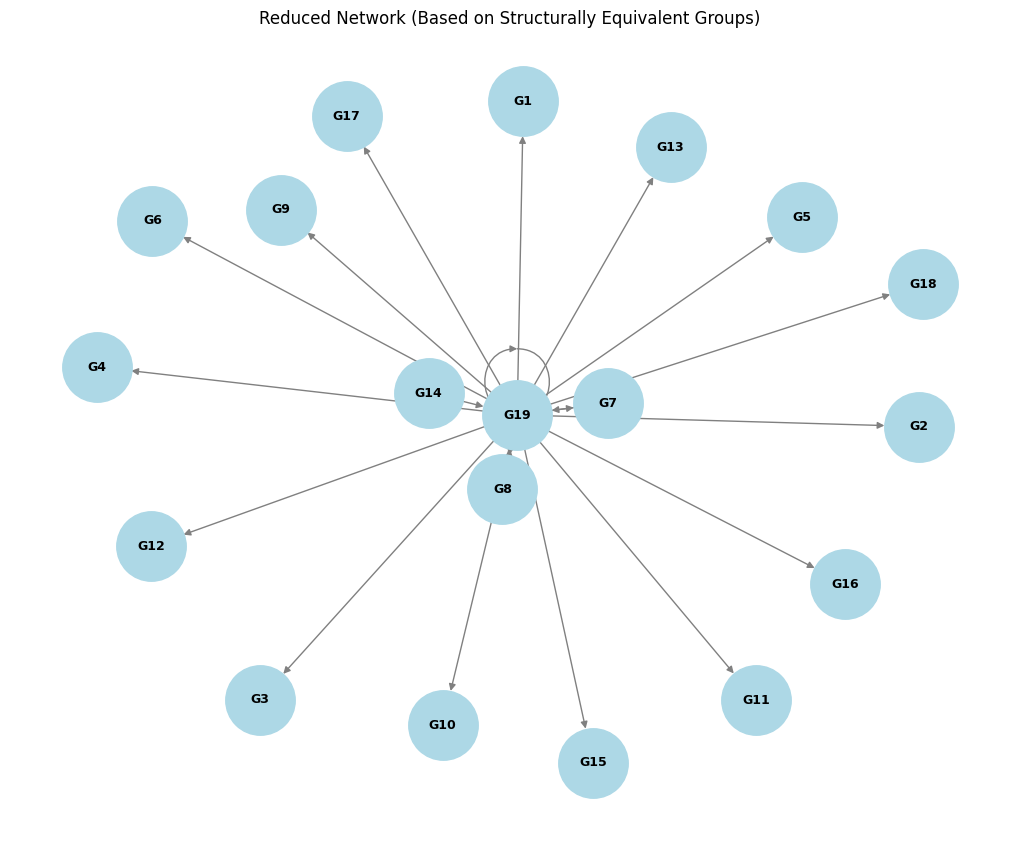

In [145]:
import matplotlib.pyplot as plt

# Create a directed graph for the reduced network
G_reduced = nx.DiGraph()

# Add nodes (equivalence groups)
for group in loaded_partitioned_matrix_df.index:
    G_reduced.add_node(group)

# Add edges based on the partitioned matrix
for i, group1 in enumerate(loaded_partitioned_matrix_df.index):
    for j, group2 in enumerate(loaded_partitioned_matrix_df.columns):
        if loaded_partitioned_matrix_df.loc[group1, group2] == 1:
            G_reduced.add_edge(group1, group2)

# Adjust the layout for better spacing
plt.figure(figsize=(10, 8))  # Increase figure size
pos = nx.spring_layout(G_reduced, seed=42, k=0.5)  # Use 'k' to control spread

# Draw the network with customized node size and font
nx.draw(
    G_reduced, pos, with_labels=True, node_color="lightblue", edge_color="gray",
    node_size=2500, font_size=9, font_weight="bold", arrowsize=10
)

plt.title("Reduced Network (Based on Structurally Equivalent Groups)")
plt.show()
